<a href="https://colab.research.google.com/github/alfa7g7/Analisis-Cuantitativo-1er-semestre/blob/main/examen-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FACULTAD DE INGENIERÍA, DISEÑO Y CIENCIAS APLICADAS
MAESTRÍA EN CIENCIA DE DATOS
TIC 60153 – Análisis Cuantitativo
Examen 1 (50 %): Modelo de Regresión Lineal


#### Declaracion de librerías a usar

In [111]:
# Importacion de pandas y asignandole el alias pd, se usa para procesos en dataframes
import pandas as pd
# Importacion de DataFrame desde la libreria de pandas.
from pandas import DataFrame
# Importacion de numpy y asignandole el alias np, se usa para calculos matriciales
import numpy as np

# Importacion de seaborn y asignándole el alias sns, se usa para analisis gráfico
import seaborn as sns
# Importacion de matplotlib.pyplot y asignándole el alias plt, se usa analisis gráfico
import matplotlib.pyplot as plt

# Importacion de StandardScaler desde la libreria sklearn, se usa para estandarizar
from sklearn.preprocessing import StandardScaler
# Importacion de mean_squared_error desde la libreria sklearn, se usa para hallar el error cuadratico medio
from sklearn.metrics import mean_squared_error
# Importacion de train_test_split desde la libreria sklearn, se usa para dividir el dataframe en conjuntos test y train
from sklearn.model_selection import train_test_split
# Importacion de LinearRegression desde la libreria sklearn, se usa para realizar un modelo de regresion lineal
from sklearn.linear_model import LinearRegression
# Importacion de r2_score desde la libreria sklearn, se usa para encontrar el error cuadrático medio
from sklearn.metrics import r2_score
# Importacion de PowerTransformer desde la libreria sklearn, se usa para transformación de valores en dataframes
from sklearn.preprocessing import PowerTransformer

# Importacion de ttest_1samp desde la libreria scipy, se usa para calculos de test o prueba
from scipy.stats import ttest_1samp
# Importacion de ttest_1samp desde la libreria scipy, se usa para calculos estadisticos
import scipy.stats as stats
# Importacion de t desde la libreria scipy, se usa para calculos estadisticos
from scipy.stats import t
# Importacion de johnsonsu desde la libreria scipy, se usa para calculos estadisticos
from scipy.stats import johnsonsu
# Importacion de boxcox desde la libreria scipy
from scipy.stats import boxcox
# Importacion de skew, kurtosis y shapiro desde la libreria scipy
from scipy.stats import skew, kurtosis, shapiro

# Importacion de statsmodels.tsa.stattools y asignandole el alias smt, se usa para procesos estadísticos en modelos
import statsmodels.tsa.stattools as smt
# Importacion de statsmodels.api y asignandole el alias sm, se usa para procesos en modelos
import statsmodels.api as sm
# Importacion de statsmodels.stats.api y asignandole el alias sms, se usa para procesos de modelos
import statsmodels.stats.api as sms
# Importacion de mad desde la libreria statsmodels.robust.scale, se usa para robustecer modelos
from statsmodels.robust.scale import mad
# Importacion de lzip desde la libreria statsmodels.compat, se usa para calculos de homocedasticidad del modelo OLS
from statsmodels.compat import lzip
# Importacion de durbin_watson desde la libreria statsmodels, se usa para determinar el coef de durbin_watson
from statsmodels.stats.stattools import durbin_watson
# Importacion de statsmodels.formula.api y asignandole el alias smf, se usa para procesos de modelos
import statsmodels.formula.api as smf

### Ejercicio No. 1 - Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.
Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto (εiiid∼ N(0, σ2)).

In [112]:
# Empezamos por leer el conjunto de datos "data1" del fichero data_exam1.xlsx
df = pd.read_excel("data_exam1.xlsx", sheet_name = 'data1')
df

Y          X  Ind
0     66.199147  12.653765    0
1     44.311301   8.204418    0
2     48.390783   8.768596    0
3     58.087413  16.169568    1
4     60.708671   9.980310    0
..          ...        ...  ...
995   54.191565   6.769546    0
996   37.481140   9.297337    1
997   26.864547   9.391452    0
998  100.950444  17.370262    0
999   65.442984  12.692550    0

[1000 rows x 3 columns]

In [113]:
# Observamos la configuración de las variables de dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
 2   Ind     1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [114]:
# Observamos los primero 5 datos (filas) del dataframe df
df.head()

Y          X  Ind
0  66.199147  12.653765    0
1  44.311301   8.204418    0
2  48.390783   8.768596    0
3  58.087413  16.169568    1
4  60.708671   9.980310    0

In [115]:
# Observamos los ultimos 5 datos (filas) del dataframe df
df.tail()

Y          X  Ind
995   54.191565   6.769546    0
996   37.481140   9.297337    1
997   26.864547   9.391452    0
998  100.950444  17.370262    0
999   65.442984  12.692550    0

In [116]:
# Observamos los nombres de las columnas o headers del dataframe df
df.columns

Index(['Y', 'X', 'Ind'], dtype='object')

In [117]:
# Observamos la descripcon analitica de los datos tabulares
df.describe()

Y            X        Ind
count  1000.000000  1000.000000  1000.0000
mean     46.953751     9.976858     0.2000
std      22.046143     3.762567     0.4002
min     -34.894319    -4.263757     0.0000
25%      32.427643     7.638899     0.0000
50%      45.460252     9.952888     0.0000
75%      61.587567    12.379984     0.0000
max     135.542574    25.628678     1.0000

In [118]:
# Observando si hay algún dato nulo x2da vez
df.isnull().any()

Y      False
X      False
Ind    False
dtype: bool

In [119]:
# Determinamos el valor de correlaciones entre las variables

# correlacion de pearson
df.corr()

Y         X       Ind
Y    1.000000  0.832057 -0.237224
X    0.832057  1.000000  0.024069
Ind -0.237224  0.024069  1.000000

In [120]:
# correlacion de kendall
df.corr(method = "kendall")


Y         X       Ind
Y    1.000000  0.610515 -0.225454
X    0.610515  1.000000  0.022964
Ind -0.225454  0.022964  1.000000

In [121]:
# correlacion de Spearman
df.corr(method = "spearman")

Y         X       Ind
Y    1.000000  0.803893 -0.275985
X    0.803893  1.000000  0.028111
Ind -0.275985  0.028111  1.000000

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>,
        <Axes: xlabel='Ind', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>,
        <Axes: xlabel='Ind', ylabel='X'>],
       [<Axes: xlabel='Y', ylabel='Ind'>,
        <Axes: xlabel='X', ylabel='Ind'>,
        <Axes: xlabel='Ind', ylabel='Ind'>]], dtype=object)

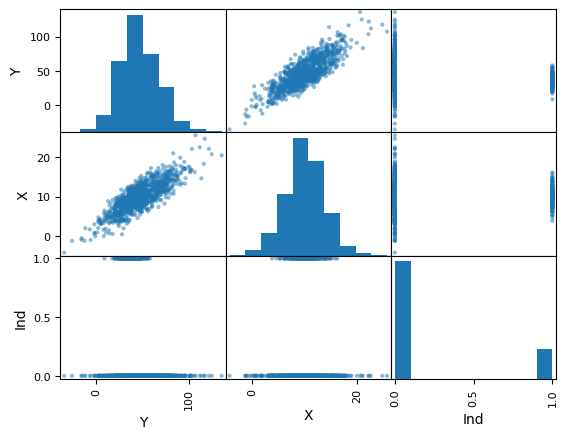

In [122]:
# Analizamos el histograma (Observados en la diagonal) y dispersión
# (Observados en la anti-diagonal) para cada una de las variables del dataframe 'df'
pd.plotting.scatter_matrix(df)

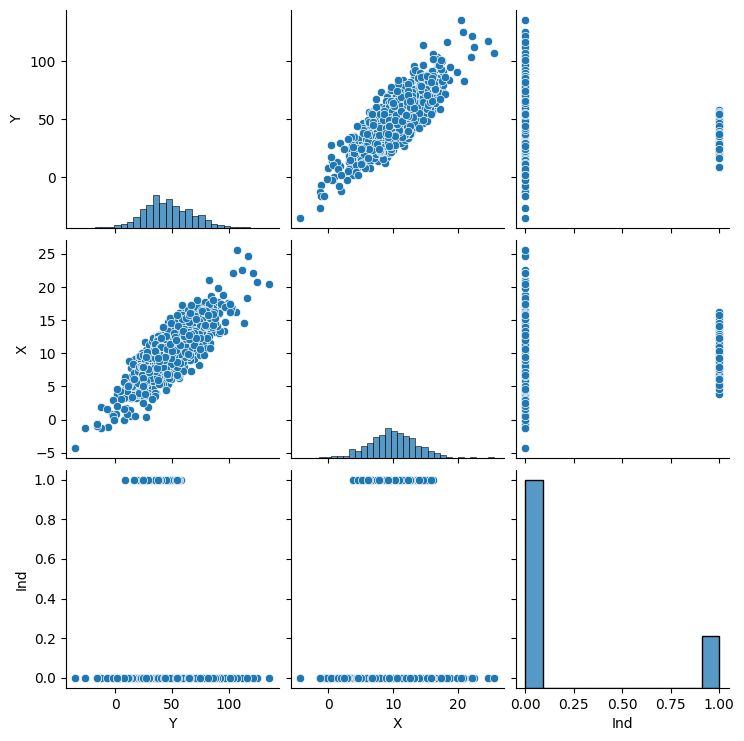

In [123]:
# Es una gráfica igual a la interior con una mejor expresión visual
sns.pairplot(df)

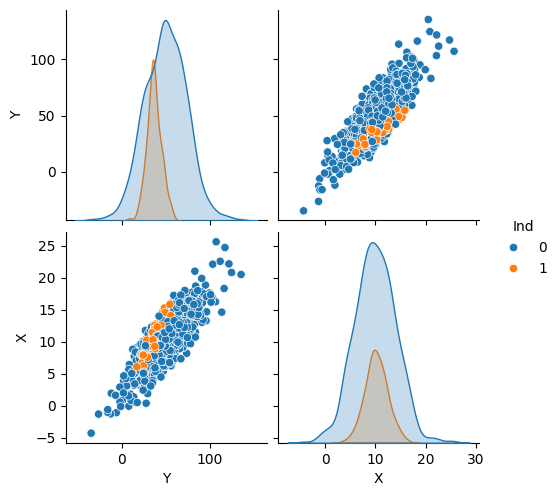

In [124]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y'
# enfoncandos o usando como pista la variable categórica 'Ind'
sns.pairplot(df, hue="Ind")

Text(0, 0.5, 'Valor tomado')

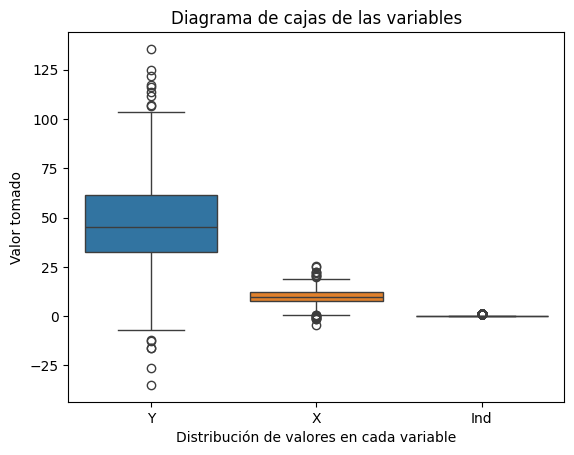

In [125]:
# Realizamos un diagrama de cajas para observar el comportamiento de los puntos
# de cada variable
sns.boxplot(df)
# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas de las variables")
plt.xlabel("Distribución de valores en cada variable")
plt.ylabel("Valor tomado")

Text(0, 0.5, 'Número de veces o cantidad para cada valor tomado')

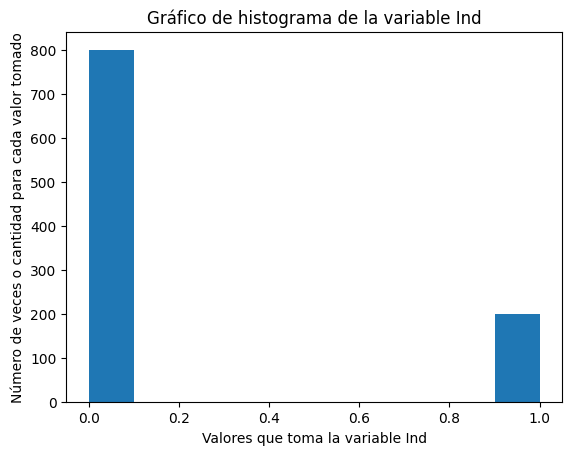

In [126]:
# Revisamos el histograma de la varaible categórica de forma individual
plt.hist(df['Ind'])

# Agregamos títulos al gráfico y ejes
plt.title("Gráfico de histograma de la variable Ind")
plt.xlabel("Valores que toma la variable Ind")
plt.ylabel("Número de veces o cantidad para cada valor tomado")

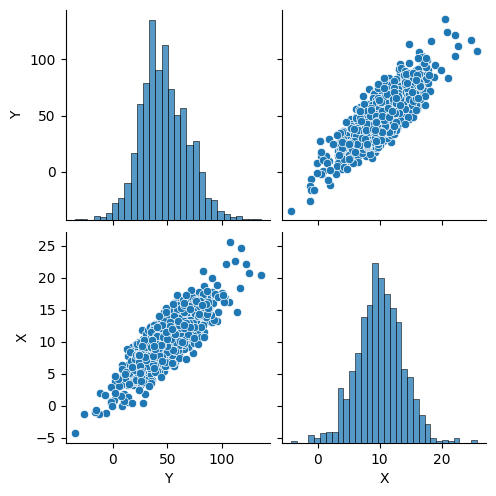

In [127]:
# Decidimos sacar la variable categorica "Ind" y solo analizar "X" y "Y"
sns.pairplot(df.drop("Ind", axis=1))

Text(0, 0.5, 'Número de veces o cantidad')

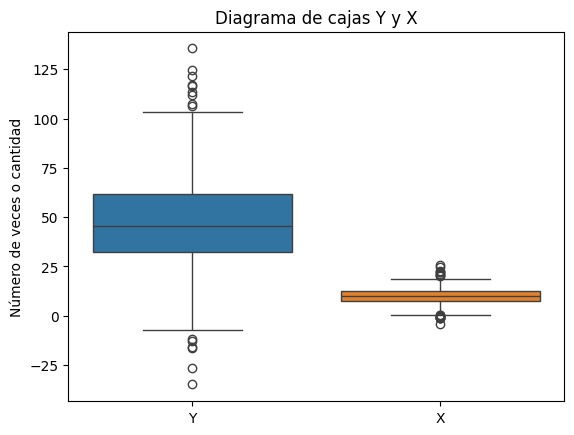

In [128]:
# De nuevo observamos solo las 2 variables que no son categóricas
sns.boxplot(df.drop("Ind", axis=1))

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas Y y X")
plt.ylabel("Número de veces o cantidad")

Text(0.5, 1.0, 'Diagrama de cajas X vs Ind')

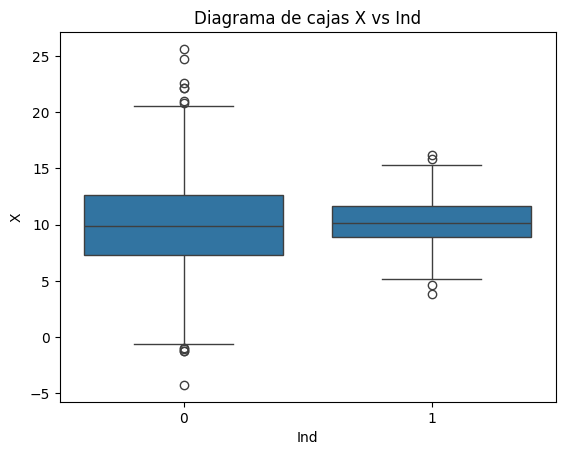

In [129]:
# De nuevo observamos solo las 2 variables cuantitativas vs la variable categórica Ind
# Graficamos 'X' vs 'Ind'
sns.boxplot(df.drop("Y", axis=1), x=df['Ind'], y=df['X'])

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas X vs Ind")

Text(0.5, 1.0, 'Diagrama de cajas Y vs Ind')

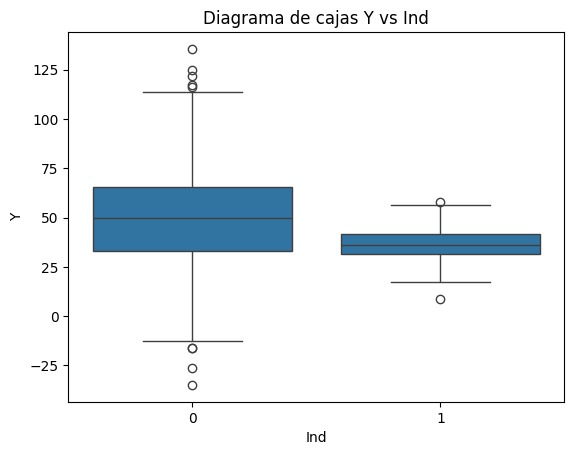

In [130]:
# Graficamos 'Y' vs 'Ind'
sns.boxplot(df.drop("X", axis=1), x=df['Ind'], y=df['Y'])

# Agregamos títulos al gráfico y ejes
plt.title("Diagrama de cajas Y vs Ind")

#### Hallazgos

- El conjunto de datos tiene 1000 filas y 3 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayuscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes y 1 columna con datos enteros. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.

- Tenemos una variable categórica llamada "Ind", la cual toma valores de "0" o "1" que podría indicar un valor de SI o NO, género FEMENINO o MASCULINO; pero son solo conjeturas rápidas. Adicional un 80% (800 veces) de sus datos toman el valor '0' y el 20% (200 veces) el valor '1'.

- De acuerdo a los gráficos de dispersión podemos ver que hay correlacion entre 'X' y 'Y' indicando así su dependencia lineal. Y la concentración de sus datos están más cerca de la medía de cada una como se observa en el gráfico de cajas

- Ahora si tomamos en cuenta la distribución de la variable 'Ind' respecto de 'X' y 'Y' y su valor de correlación, no podemos afirmar que tengan dependencia lineal significativa, especialmente con 'Y', ya que su 80% de valores forman o dibujan una recta con una pendiente diferente al que realizan el otro 20% com ose muestra en la gráfica. Ahora con respecto a 'X' la situación varía un poco pues pareciera que es un desplazamiento de la misma, pero de nuevo consideramos que no es significativa.

- De acuerdos a las correlaciones hechas podemos decir, que 'X' y 'Y'  presentan pendientes concordantes si se quisiera trazar una recta en tre ellas. Si analizamos 'Ind' y 'Y', podriamos decir que son discordantes pues generaría tambien una pendiente negativa en algunos puntos. Y si vemos 'X' y 'Ind' este también sería concordante con un valor tendiendo casi a cero.

¿Considera que podría generar un modelo de regresión lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

Consideramos que NO se puede generar un modelo de regresión lineal con la variable categórica (sin interación para la variable 'Y'. Debido que no tienen correlación y adicional gráficamente se intuye que no tienen correlaciones y podría generarse un falso positivo. Su relación no es lineal

Ahora hagamos el ejercicio de hacer el modelo y observar lo que obtenemos de toda forma para la parte académica:

In [131]:
# Creación del modelo sin interación de la variable categórica Ind  para la variable Y
Y_modelo = df["Y"] #Variable respuesta

# variables explicativas
X_modelo = df.drop("Y", axis=1)

# Variable de constante que se agrega siempre de valores 1
# para la elaboracion del modelo OLS, el intercepto
X_modelo = sm.add_constant(X_modelo)

# X_modelo se puede resumir en 1 sola linea: X_modelo = sm.add_constant(df.drop(´Y´, axis=1))

modelo = sm.OLS(Y_modelo, X_modelo)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          2.25e-308
Time:                        15:33:45   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

Prob (F-statistic):2.25e-308 < 0.05

Al cumplir esta condición númerica podemos concluir que el modelo nos sirve
apriori

Forma habitual de hacer el calculo de los coeficientes de regresión
$\beta = (X^\top X)^{-1} X^\top y$

In [132]:
# Comprobación manual del calculo matricial de los betas b0, b1 y b2

#Asignamos 2 variables para el calculo X_design y Y_design
X_design = X_modelo
y_design = Y_modelo

#Calculamos por partes:
# Calculamos en la variable left_term: (X^\top X)^{-1}
left_term = np.linalg.inv(np.matmul(X_design.transpose(), X_design))
# Calculamos en la variable right_term: X^\top y$
rigth_term = np.matmul(X_design.transpose(), y_design)

betas = np.matmul(left_term, rigth_term)
print(betas)

[  0.78732709   4.91160016 -14.17957698]


#### Supuestos

In [133]:
# 0. Media cero: Usamos un one sample t test con media en 0 para verificar justamente
# que los residuales esten centrados en cero

ttest_1samp(resultados.resid, 0)

# HO: Los residuales están centrados en cero
# H1: Los residuales no están centrados en cero
# El valor es cercano a 1 lo que significa que no hay
# evidencia significativa para rechazar la hipótesis nula.


TtestResult(statistic=-6.106157525987408e-14, pvalue=0.9999999999999514, df=999)

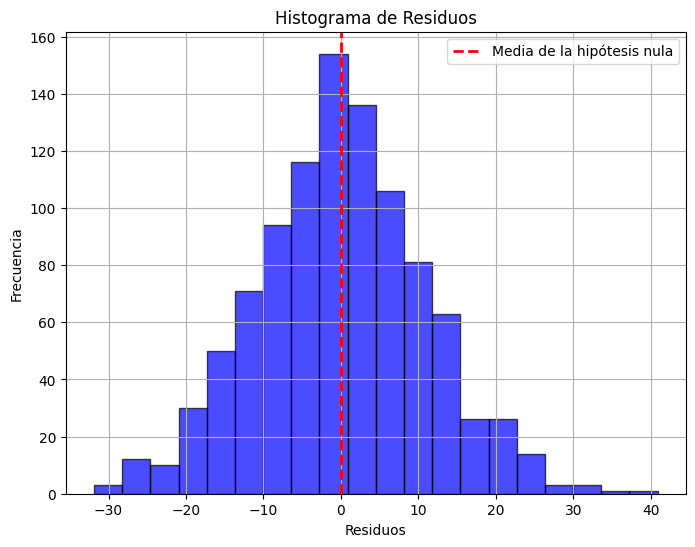

In [134]:
plt.figure(figsize=(8, 6))
plt.hist(resultados.resid, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Media de la hipótesis nula')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.legend()
plt.grid(True)
plt.show()

Se evidencia en la gráfica  que la mayoria de valores son cercanos a 0

In [ ]:
# 1. Normalidad: Usamos Jarque-Bera, si el p-value Prob(JB) es mayor a 0.05,
# no rechazo la hipotesis nula por lo tanto concluyo normalidad.
# H0: X ~ normal
# H1: X !~ normal

# Tenemos p-value Prob(JB) = 0.295
# Concluimos normalidad en el modelo resultados y está cumplido este supuesto

In [ ]:
# 2. Independencia: Usamos Durbin-Watson, si el valor DW esta entre 1.5 y 2.5
# decimos que hay independencia en los errores de lo contrario,
# los errores no serian independientes.

# Durbin-Watson = 1.997
# Concluimos que hay independiencia en los errores y está cumpliendo los supuestos.

In [136]:
# 3. Homocedasticidad: Usamos Breuschpagan test para el tema de homogeneidad de varianzas,
# Si el p_value asociado al multiplicador de lagranse es mayor a 0.05
# concluimos homocedasticidad de lo contrario concluimos heterocedasticidad.

#Para calcular homocedasticidad
names = ["lagrange-multiplier-statistic", "p-value", "f-value", "f-p-value"]

# residuales y exogenos
bp_test = sms.het_breuschpagan(resultados.resid, resultados.model.exog)

lzip(names, bp_test)

# Concluimos homocedasticidad

[('lagrange-multiplier-statistic', 64.60486660135223),
 ('p-value', 9.359043491930456e-15),
 ('f-value', 34.42986268675474),
 ('f-p-value', 3.4758447737327506e-15)]

#### Interpretación del modelo "modelo"


In [ ]:
# R-squared = 0.759 = 75.9% - Adj. R-squared = 0.758 = 75.8%
# Estos dos valores nos indican en que porcentaje o valor la variable dependiente 'Y'
# puede ser predecida por las variables predictoras o independientes ('X', 'Ind'),
# en este caso un 75% de acierto

# beta_0 = const.coef = 0.7873 Este es el intercepto de la regresión.
# Esto quiere deicr que cuando todas las variables independientes ('X', 'Ind') son cero,
# se supone que el valor de la variable dependiente 'Y' sea más o menos 0.7873.

# beta_1 = X.coef = 4.9116
# Por cada unidad de aumento en la variable "X", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 4.9116 unidades

# beta_2 = Ind.coef = -14.1796
# Por cada unidad de aumento en la variable "Ind", suponiendo el resto de variables constantes,
# se espera que "Y" aumente -14.1796 unidades




Text(0, 0.5, 'Variable Y')

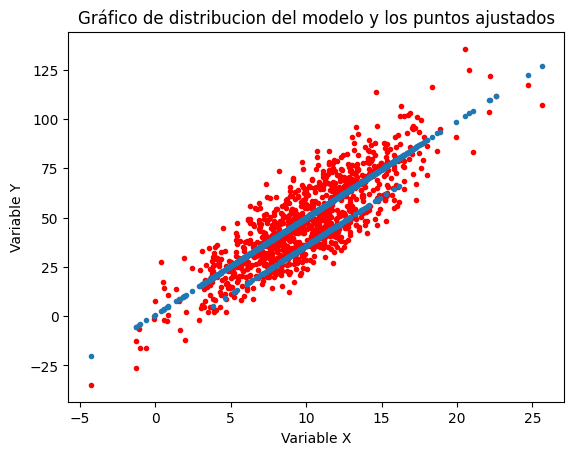

In [ ]:
# Graficando el modelo respuesta

plt.plot(X_modelo.X, Y_modelo, '.', color="red")
plt.plot(X_modelo.X, resultados.fittedvalues, '.')

# Agragamos títulos al gráfico y ejes
plt.title("Gráfico de distribucion del modelo y los puntos ajustados")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

Como se evidencia en la gráfica lo ideal sería agregar interaciones entre las variables cuantitativas 'X' y 'Y' y la variable cualitativa 'Ind' para poder llegar a un modelo que se ajuste más a lo que buscamos y no obtener así 2 diferentes tipos de respuesta que acarrearían como dijimos anteriormente un falso positivo, una interpretacción errada al final. un modelo que no sirve. Pues al ser una variable vibariante (que solo toma valores de 0 o 1) nos hace generar dos regresiones una para cada valor que ella toma y manipula en la función. En el mundo real probablemente esta vriable sería sacada del modelo por su no correlación lineal, pero para la parte académica hemos decidido dejarla ahí para observar su comportamiento.

#### Ahora iniciaremos la segunda parte de la pregunta:

Realice un gráfico de dispersión para Y vs X, considerando para cada observación su respectivo valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media de cambio de Y condicionado a incrementos unitarios de X? ¿Considera que un modelo con interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo propuesto (εiiid∼ N(0, σ2)).

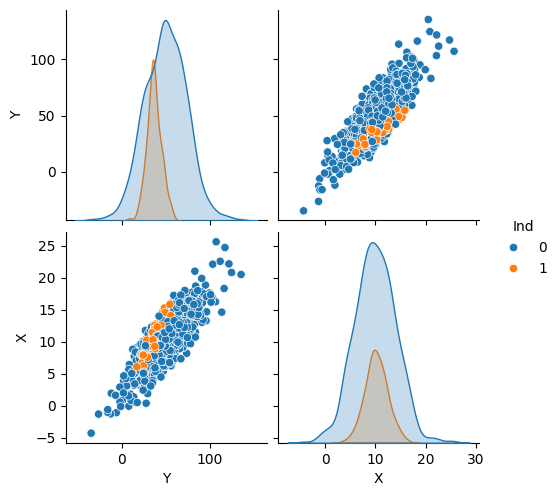

In [ ]:
# Observamos graficamente el comportamiento de las variables 'X' y 'Y'
# enfoncandos o usando como pista la variable categórica 'Ind'
sns.pairplot(df, hue="Ind")

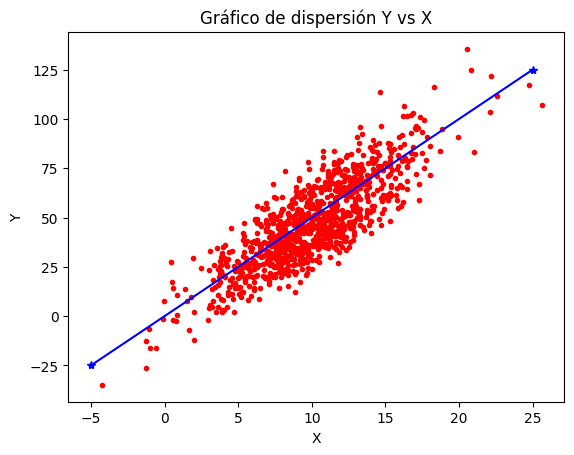

In [ ]:
# Realizamos gráfico de dispersión de las variables Y vs X
plt.plot(df.X, df.Y, '.', color="red")

# Agragamos títulos al gráfico y ejes
plt.title("Gráfico de dispersión Y vs X")
plt.xlabel("X")
plt.ylabel("Y")

# Observamos que una recta podría desribir visulamente el gráfico de dispersión creado por
# las 2 variables.
plt.plot([-5, 25], [-25, 125], "*", color = "blue")
plt.plot([-5, 25], [-25, 125], color = "blue")

Consideramos que la evidencia muestral nos sugiere un cambio en la tasa media de cambio de Y, condicionado a incrementos en X

Respecto a si un modelo con interacciones de las variables predictora y la variable categórica sería más adecuado tenemos 2 perspectivas:
1. Para este caso espefíco, si! debido a que esta interación ayudaría a descrbir por completo o de una mejorar manera la relación entre las variables.

2. Para la creación de un modelo que nos permita evaluar otros conjuntos de datos para este mismo campo de acción si sería lo idonéo pues nos ahorraría tiempo en proceso como el EDA y demás.

Teniendo en cuenta estas 2 observaciones concluimos que lo idóneo con el fin de predecir el comportamiento de otros componentes o elementos de la muestra que desconocemos u otros conjuntos de datos futuros del mismo sistema o area de estudio es adecuado usar un modelo con iteracciones.




In [ ]:
#Construccion del modelo con interacciones
# Hacemos un dataframe df_int donde incluimos una interaccion en una variable X2
# la cual la defineremos como el valor multiplicado de 'X' por 'Ind' creando así su
# interacción

df_int = df.copy()
df_int["X2"] = df_int["X"]*df_int["Ind"]

df_int.head()

Y          X  Ind         X2
0  66.199147  12.653765    0   0.000000
1  44.311301   8.204418    0   0.000000
2  48.390783   8.768596    0   0.000000
3  58.087413  16.169568    1  16.169568
4  60.708671   9.980310    0   0.000000

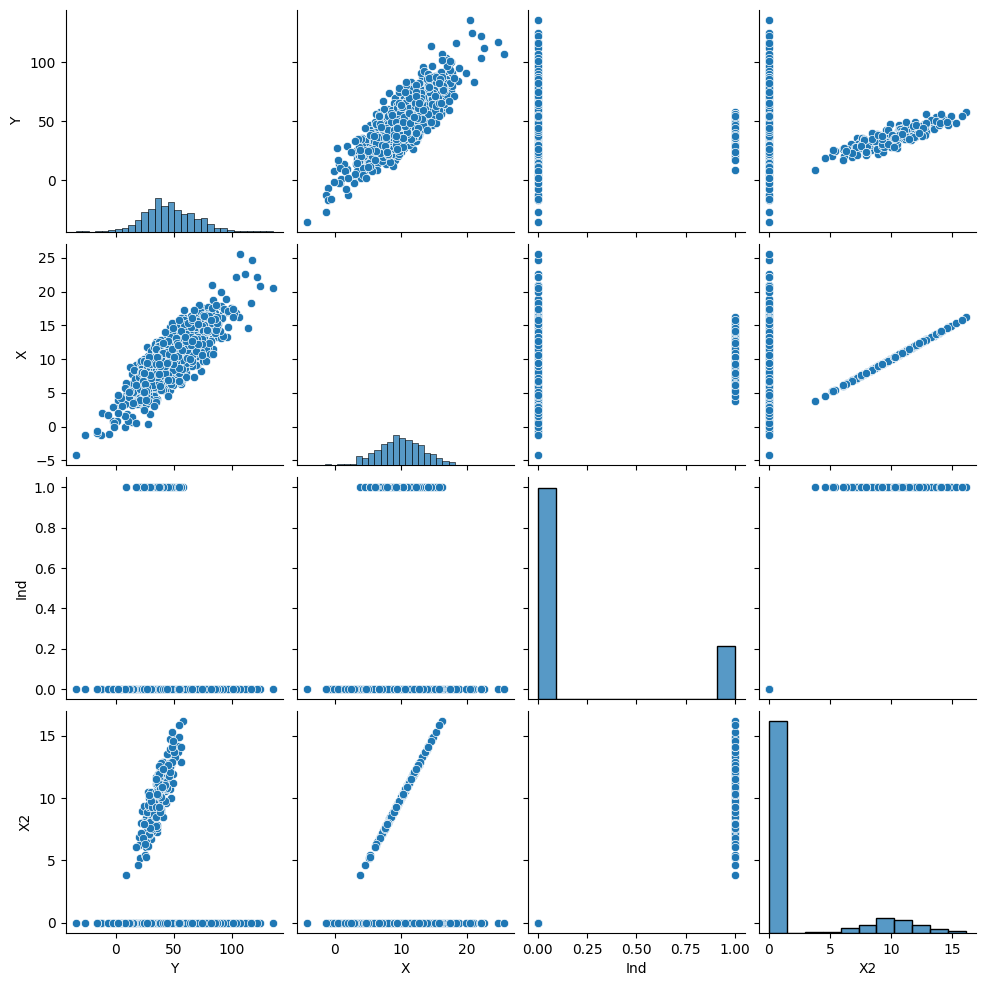

In [ ]:
# Observamos graficamente el comportamiento de las variables
sns.pairplot(df_int)

In [ ]:
# Determinamos el valor de correlaciones entre las variables

# correlacion de pearson
df_int.corr()

Y         X       Ind        X2
Y    1.000000  0.832057 -0.237224 -0.196048
X    0.832057  1.000000  0.024069  0.086396
Ind -0.237224  0.024069  1.000000  0.971261
X2  -0.196048  0.086396  0.971261  1.000000

In [ ]:
# correlacion de kendall
df_int.corr(method = "kendall")

Y         X       Ind        X2
Y    1.000000  0.610515 -0.225454 -0.167944
X    0.610515  1.000000  0.022964  0.088042
Ind -0.225454  0.022964  1.000000  0.943071
X2  -0.167944  0.088042  0.943071  1.000000

In [ ]:
# correlacion de Spearman
df_int.corr(method = "spearman")

Y         X       Ind        X2
Y    1.000000  0.803893 -0.275985 -0.249375
X    0.803893  1.000000  0.028111  0.069607
Ind -0.275985  0.028111  1.000000  0.991770
X2  -0.249375  0.069607  0.991770  1.000000

In [ ]:
# Modelo lineal con iteraccion
Y_modelo2 = df_int["Y"]
X_modelo2 = sm.add_constant(df_int.drop("Y", axis = 1))

modelo2 = sm.OLS(Y_modelo2, X_modelo2)
resultados2 = modelo2.fit()

print(resultados2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.34e-312
Time:                        15:51:47   Log-Likelihood:                -3787.5
No. Observations:                1000   AIC:                             7583.
Df Residuals:                     996   BIC:                             7603.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4991      1.001     -0.498      0.6

Prob (F-statistic):1.34e-312 < 0.05

Al cumplir esta condición númerica podemos concluir que el modelo nos sirve
apriori

#### Supuestos

In [ ]:
# 0. Media cero: Usamos un one sample t test con media en 0 para verificar justamente que
# los residuales esten centrados en cero

# para mirar si el modelo está centrado en cero. Para el supuesto 0
from scipy.stats import ttest_1samp

ttest_1samp(resultados2.resid, 0)

#Falta la conclusion de los resultados

TtestResult(statistic=-5.56737193353094e-14, pvalue=0.9999999999999556, df=999)

In [ ]:
# 1. Normalidad: Usamos Jarque-Bera, si el p-value Prob(JB) es mayor a 0.05,
# no rechazo la hipotesis nula por lo tanto concluyo normalidad.
# H0: X ~ normal
# H1: X !~ normal

# Tenemos p-value Prob(JB) = 0.0902
# Concluimos normalidad en el modelo resultados y está cumplido este supuesto

In [ ]:
# 2. Independencia: Usamos Durbin-Watson, si el valor DW esta entre 1.5 y 2.5
# decimos que hay independencia en los errores de lo contrario,
# los errores no serian independientes.

# Durbin-Watson = 1.985
# Concluimos que hay independiencia en los errores y está cumpliendo los supuestos.

In [ ]:
# 3. Homocedasticidad: Usamos Breuschpagan test para el tema de homogeneidad de varianzas,
# Si el p_value asociado al multiplicador de lagranse es mayor a 0.05 concluimos
#homocedasticidad de lo contrario concluimos heterocedasticidad.

names2 = ["lagrange-multiplier-statistic", "p-value", "f-value", "f-p-value"]
# residuales y exogenos
bp_test = sms.het_breuschpagan(resultados2.resid, resultados2.model.exog)

lzip(names, bp_test)

# Concluimos homocedasticidad

[('lagrange-multiplier-statistic', 83.04028836791721),
 ('p-value', 6.835236597869036e-18),
 ('f-value', 30.06607093901456),
 ('f-p-value', 1.3067597184142322e-18)]

#### Interpretacion del modelo "modelo2"

In [ ]:
# R-squared = 0.765 = 76.5% - Adj. R-squared = 0.764 = 76.4%
# Estos dos valores nos indican en que porcentaje o valor la variable dependiente 'Y'
# puede ser predecida por las variables predictoras o independientes ('X', 'Ind', 'X2'),
# en este caso un 76% de acierto

# beta_0 = const.coef = -0.4991 Este es el intercepto de la regresión.
# Esto quiere deicr que cuando todas las variables independientes ('X', 'X2', 'Ind') son cero,
# se supone que el valor de la variable dependiente 'Y' sea más o menos -0.4991.

# beta_1 = X.coef = 5.0411
# Por cada unidad de aumento en la variable "X", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 5.0411 unidades

# beta_2 = Ind.coef = 4.5491
# Por cada unidad de aumento en la variable "Ind", suponiendo el resto de variables constantes,
# se espera que "Y" aumente 4.5491 unidades

# beta_3 = X2.coef = -1.8466
# Por cada unidad de aumento en la variable "X2", suponiendo el resto de variables constantes,
# se espera que "Y" aumente -1.8466 unidades

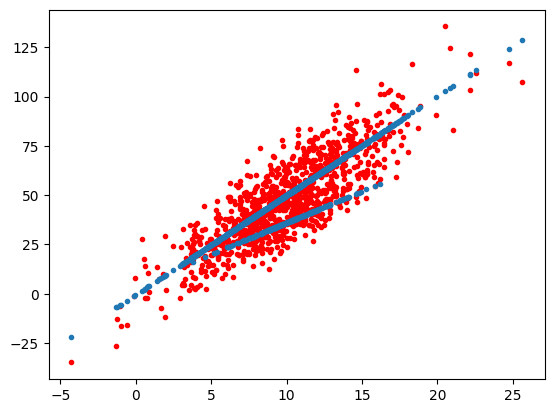

In [ ]:
# Graficando el modelo respuesta

plt.plot(X_modelo2.X, Y_modelo2, '.', color="red")
plt.plot(X_modelo2.X, resultados2.fittedvalues, '.')

Al tener interacción su comportamiento visual en la gráfica cambia y se puede intuir que en algun punto se interceptan las gráficas de rectas resulantes del modelado lo cual no indican que la interacción mejoró, si se conservaran dos rectas paralelas coomo en el modelo sin interacción pues no habríamos hecho nada que significara una mejora.
Aquí también nos planteamos que adicionalmente podríamos sacar esta variable en el mundo real en un comentario muy a grosso modo sin tener idea del dominio del conjunto de datos.

### Ejercicio No. 2 - Considere el conjunto de datos “data2” del fichero data_exam1.xlsx

Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bi-variante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.

De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica, sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modeloo: (εiiid∼ N(0, σ2)).

#### Análisis exploratorio de datos (EDA)

In [3]:
#Empezamos por leer el conjunto de datos "data2" del fichero data_exam1.xlsx
df2 = pd.read_excel("data_exam1.xlsx", sheet_name = 'data2')
df2

Y         X
0    12.189142  0.226957
1    12.187456  0.088938
2    11.782692  0.199069
3     5.732032  0.003812
4     7.026970  0.004573
..         ...       ...
995  10.283153  0.053585
996  -5.006186  0.000002
997  13.845597  0.073044
998  14.012956  0.085079
999  11.521064  0.108597

[1000 rows x 2 columns]

In [4]:
# Observamos la configuración de las variables de dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       1000 non-null   float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [10]:
print("El dataframe df2 tiene:", len(df2), "Registros")

El dataframe df2 tiene: 1000 Registros


In [5]:
# observamos los primero 5 datos (filas) del dataframe df
df2.head()

Y         X
0  12.189142  0.226957
1  12.187456  0.088938
2  11.782692  0.199069
3   5.732032  0.003812
4   7.026970  0.004573

In [6]:
# Observamos los ultimos 5 datos (filas) del dataframe df
df2.tail()

Y         X
995  10.283153  0.053585
996  -5.006186  0.000002
997  13.845597  0.073044
998  14.012956  0.085079
999  11.521064  0.108597

In [7]:
# Observamos los nombres de las columnas o headers del dataframe df
df2.columns

Index(['Y', 'X'], dtype='object')

In [13]:
# Observando si hay algún dato nulo
df2.isnull().any()

Y    False
X    False
dtype: bool

In [12]:
# Observando si hay algún nulo por 2 vez
df2.isnull().sum()

Y    0
X    0
dtype: int64

##### Hallazgos
- El conjunto de datos tiene 1000 filas y 2 columnas

- Sus encabezados o nombres de columnas tienen el mismo orden, primera letra mayúscula; además no tienen simbolos o espacios.

- Tenemos 2 columnas con datos tipo flotantes. Adicional de los 1000 registros no contamos con ningún dato nulo o faltante.



In [14]:
# Observamos la descripcon analitica de los datos tabulares
df2.describe()

Y             X
count  1000.000000  1.000000e+03
mean      9.445622  7.234805e-02
std       3.908189  9.753985e-02
min     -12.073239  1.343729e-08
25%       7.411486  8.450417e-03
50%      10.072134  3.655172e-02
75%      12.082546  9.992523e-02
max      17.838788  9.397465e-01

##### ¿Qué puede decir acerca del comportamiento distribucional de cada variable?

###### Descripción de los datos de X:

- Se observa una media igual a 0.072
- Se observa una desviación estándar de 0.0975
- Se observa un valor mínimo en X de 0.0000000134
- Se observa que hasta el 25% de los datos de X son menores o iguales a 0.00845
- Se observa que más o menos el 50% de los datos de X son menores o mayores a 0.0365
- Se observa que hasta el 75% de los datos de X son menores o iguales a a 0.0999
- Se observa un valor máximo en X de 0.939

###### Descripción de los datos de Y:

- Se observa una media igual a 9.445
- Se observa una desviación estándar de 3.9081
- Se observa un valor mínimo en Y de -12.073
- Se observa que hasta el 25% de los datos de Y son menores o iguales a 7.4114
- Se observa que más o menos el 50% de los datos de Y son menores o mayores a 1.0721
- Se observa que hasta el 75% de los datos de Y son menores o iguales a a 12.0825
- Se observa un valor máximo en X de 17.8387

In [16]:
# La evaluación de la simetría entre los datos de X y Y
# nos muestra que la dispersión con respecto a la media tiene un
# comportamiento asimétrico negativo para los valores de Y y asimétrico positivo
# para los valores de X.
df2.skew()

Y   -1.103681
X    2.952165
dtype: float64

(array([733., 171.,  52.,  24.,  11.,   6.,   0.,   0.,   2.,   1.]),
 array([1.34372911e-08, 9.39746626e-02, 1.87949312e-01, 2.81923961e-01,
        3.75898610e-01, 4.69873259e-01, 5.63847908e-01, 6.57822558e-01,
        7.51797207e-01, 8.45771856e-01, 9.39746505e-01]),
 <BarContainer object of 10 artists>)

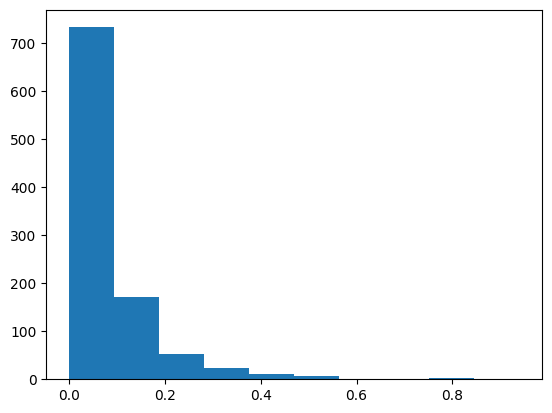

In [ ]:
# analizamos el histograma y dispersión para cada una de las variables del dataframe iniciamos por X
# Histograma de la variable X del dataframe df2
plt.hist(df2.X)

En el histograma de X podemos observar valores atípicos entre 0.75 y 0.85

Se puede observar también en el histograma que la mayor frecuencia de valores están entre 0.0 y 0.1

(array([  3.,   1.,   8.,  10.,  42.,  80., 227., 351., 233.,  45.]),
 array([-12.07323856,  -9.08203587,  -6.09083318,  -3.09963048,
         -0.10842779,   2.8827749 ,   5.8739776 ,   8.86518029,
         11.85638298,  14.84758567,  17.83878837]),
 <BarContainer object of 10 artists>)

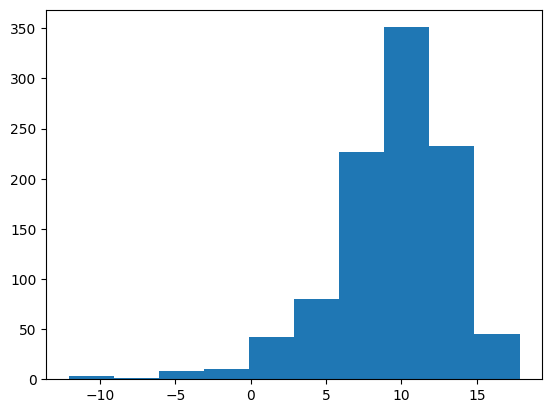

In [ ]:
# Histograma de la variable X del dataframe df2
plt.hist(df2.Y)

En el histograma de Y podemos observar valores atípicos entre -9 y -12

Se puede observar también en el histograma que la mayor frecuencia de valores están entre 6 y 15

#### Análisis bivariante

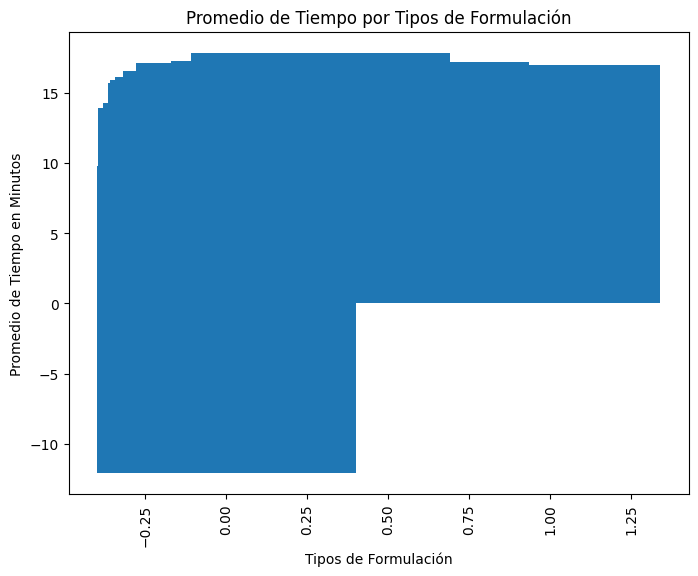

In [19]:
# Agrupamos los datos por la variable categórica y calcula el
# promedio de la variable numérica para cada categoría
prom_por_categoria = df2.groupby('X')['Y'].mean()
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)

# Graficamos el promedio por categoría
plt.bar(prom_por_categoria.index, prom_por_categoria)
plt.xlabel('Tipos de Formulación')
plt.ylabel('Promedio de Tiempo en Minutos')
plt.title('Promedio de Tiempo por Tipos de Formulación')
plt.show()

Text(0.5, 1.0, 'Gráfico de Dispersión: X vs Y')

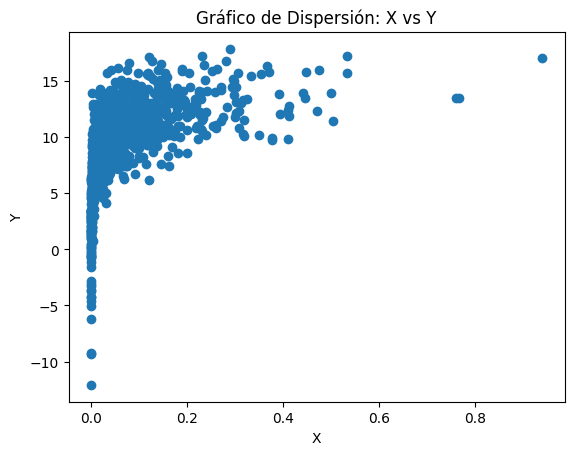

In [20]:
# Diagrama de dispersion de la variable X del dataframe df2
plt.scatter(df2.X, df2.Y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: X vs Y')

Text(0.5, 1.0, 'Gráfico de Dispersión: Y vs X')

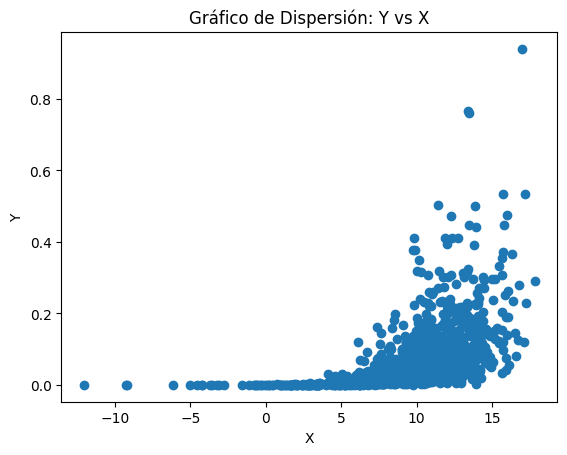

In [22]:
# Diagrama de dispersion de la variable Y del dataframe df2
plt.scatter(df2.Y, df2.X)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: Y vs X')

In [21]:
# Calculo de las correlaciones del conjunto de datos
df2.corr()

Y         X
Y  1.000000  0.520376
X  0.520376  1.000000

Al calcular la correlación de variables, podemos observar que es baja, 0.52

array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X'>, <Axes: xlabel='X', ylabel='X'>]],
      dtype=object)

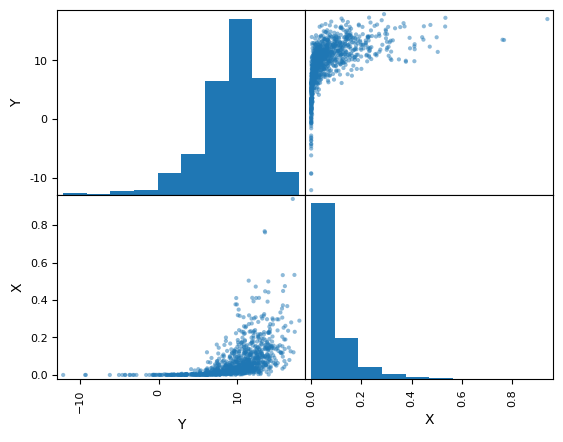

In [ ]:
pd.plotting.scatter_matrix(df2)

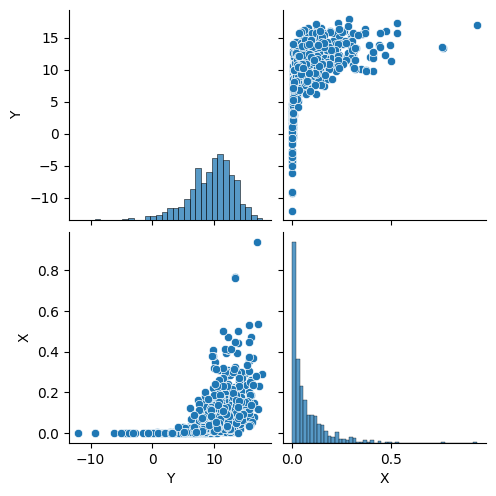

In [ ]:
# es una gráfica igual a la interior con una mejor expresión gráfica
sns.pairplot(df2)

De acuerdo a los gráficos de dispersión podemos ver que hay no hay una correlacion clara entre 'X' y 'Y', la dispersiones de las variables son concentradas perpendicularmente opouestas o espejo la una de la otra. Con esto si tratamos de darle sentido no sería una relación lineal pues no obtendriamos un elipse, en cambio iríamos más hacía un circulo.

#### ¿Considera que la dispersión bivariante da indicios para generar un modelo de regresión para Y? Justifique detalladamente.


Cada variable se distribuye de forma perpendicularmente opuesta

En los dos gráficos anteriores y en el cálculo de la correlación, vemos que en la dispersión bivariante de 'X' y 'Y' no existe una relación Lineal, lo cual implica que a este punto no puedo aplicar un modelo de regresión lineal, se requiere una transformación.

Esta dispersión bi-variante así como está no muestra relación lineal significativa o importante para desarrollar un modelo de regresión para 'Y', puesto que si observamos su distribución en conjunto la figura o forma que podemos asemejar o crear mentalmente no es de forma eliptica.

Ahora bien haciendo alguna transformación podriamos acomodarla y de ahí si obtener una relación lineal que se asemejaría a la ya menciona forma de elipse.

In [23]:
cont_valores = df2['X'].value_counts()
cont_valores

X
0.226957    1
0.008678    1
0.022174    1
0.224420    1
0.097164    1
           ..
0.001229    1
0.011447    1
0.128387    1
0.058639    1
0.108597    1
Name: count, Length: 1000, dtype: int64

In [24]:
cont_valores = df2['Y'].value_counts()
cont_valores

Y
12.189142    1
10.553439    1
11.254788    1
13.928096    1
9.059004     1
            ..
6.715903     1
10.786996    1
8.687497     1
8.626720     1
11.521064    1
Name: count, Length: 1000, dtype: int64


#### Se propone Realizar una transformación logarítmica base 10 a la variable Y.

Dado que la gráfica de X vs Y muestra un comportamiento exponencial, es difícil encontrar un modelo de regresión Lineal que minimice la suma de los cuadrados de las distancias entre los puntos de la gráfica y la recta.

Por lo tanto aplicaremos una transformación logarítmica y volvemos a graficar.

In [25]:
df = pd.DataFrame()
df['Y'] = np.log(df2['Y'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       977 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [31]:
df

Y
0    2.500546
1    2.500407
2    2.466632
3    1.746070
4    1.949756
..        ...
995  2.330507
996       NaN
997  2.627967
998  2.639982
999  2.444177

[1000 rows x 1 columns]

In [32]:
df['X'] = df2['X']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       977 non-null    float64
 1   X       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [33]:
#Determinación de valores nulos o faltantes
df.isnull().sum()

Y    23
X     0
dtype: int64

In [39]:
# Decidimos eliminar los registros faltantes o nulos que son 23
df3 = df.dropna(axis=0)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       977 non-null    float64
 1   X       977 non-null    float64
dtypes: float64(2)
memory usage: 22.9 KB


In [40]:
df3.isnull().sum()

Y    0
X    0
dtype: int64

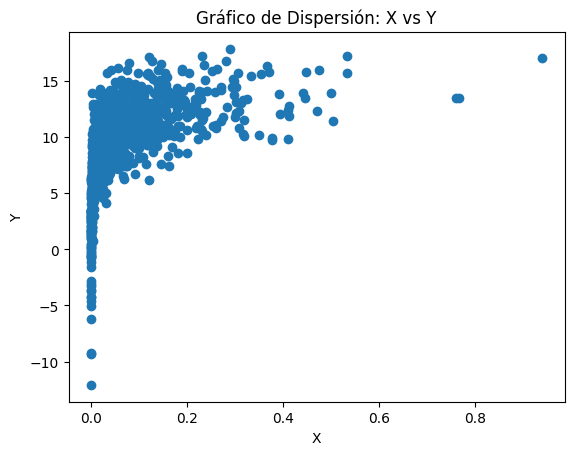

In [36]:
# Crear la gráfica de dispersión
plt.scatter(df2['X'], df2['Y'])

# Añadir etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: X vs Y')

# Mostrar la gráfica
plt.show()

In [41]:
df3.corr()

Y         X
Y  1.000000  0.423771
X  0.423771  1.000000

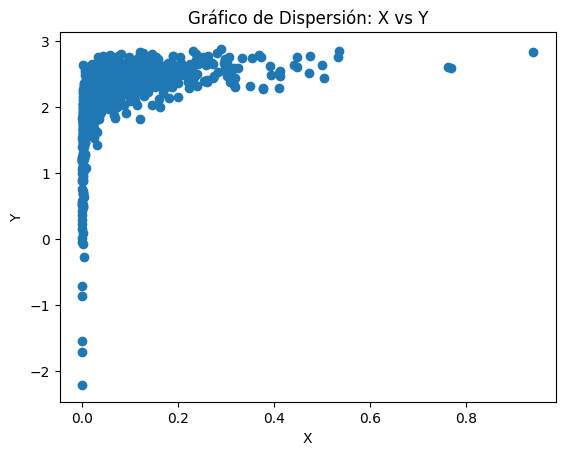

In [42]:
# Crear la gráfica de dispersión
plt.scatter(df3['X'], df3['Y'])

# Añadir etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: X vs Y')

# Mostrar la gráfica
plt.show()

Se observa en las gráficas anteriores que la relación entre variables sigue siendo no lineal y la correlación entre variables es muy baja.

#### Probamos otro tipo de transformación aplicando el algoritmo de Johnson

In [45]:
transformador = PowerTransformer(method='box-cox', standardize=True)

grupo2_datos1 = pd.DataFrame()
grupo2_datos1['X'] = np.log(df['Y'])

grupo2_datos1['X'] = transformador.fit_transform(df[['X']])
grupo2_datos1['Y'] = df['Y']

grupo2_datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       1000 non-null   float64
 1   Y       977 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
grupo2_datos1.isnull().sum()

X     0
Y    23
dtype: int64

In [47]:
grupo2_datos1.corr()

X         Y
X  1.000000  0.702302
Y  0.702302  1.000000

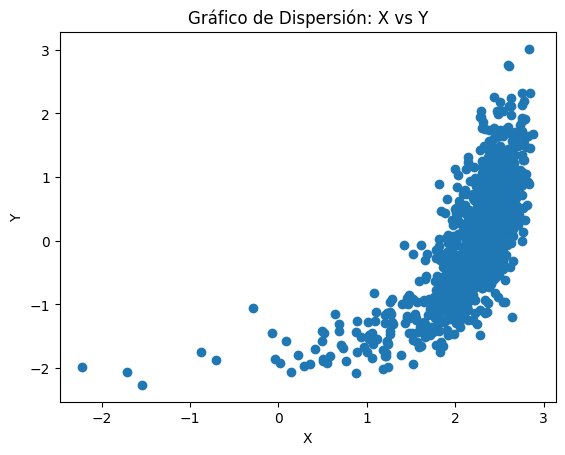

In [48]:
# Crear la gráfica de dispersión
plt.scatter(grupo2_datos1['Y'], grupo2_datos1['X'])

# Añadir etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión: X vs Y')

# Mostrar la gráfica
plt.show()

Vemos en la gráfica anterior que aún la relación entre las variables no es lineal y aunque el cálculo de la correlación aumentó, la gráfica muestra que aún no se obtiene relación lineal.

#### Se propone aplicar otra transformación, en este caso una transformación polineal

In [62]:
df3 = pd.DataFrame(df2)
#Quitar valores negativos de Y
df3 = df3.loc[df3['Y'] >= 0]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       977 non-null    float64
 1   X       977 non-null    float64
dtypes: float64(2)
memory usage: 22.9 KB


Aplicar transformación polineal dado que la gráfica del dataset original muestra un comportamiento exponencial y que la transformación de raiz cuadrada y de Johnson no mejora la relación entre las variables.

In [63]:
# Aplicar transformación polineal dado que la gráfica del dataset original muestra
# un comportamiento exponencial y que la transformación de raiz cuadrada
# no mejora la relación entre las variables.

# Definir las columnas que se desean transformar
columns_to_transform = ['Y', 'X']  # Reemplaza con los nombres de las columnas reales

# Iterar sobre las columnas y aplicar la transformación Box-Cox
for column in columns_to_transform:
    # Aplicar la transformación Box-Cox y obtener los datos transformados
    transformed_data, _ = boxcox(df3[column])
    # Reemplazar los datos originales con los transformados en el DataFrame
    df3[column] = transformed_data

In [66]:
# Observamos la correlacion de de las variables
df3.corr(method='pearson')

Y         X
Y  1.000000  0.773963
X  0.773963  1.000000

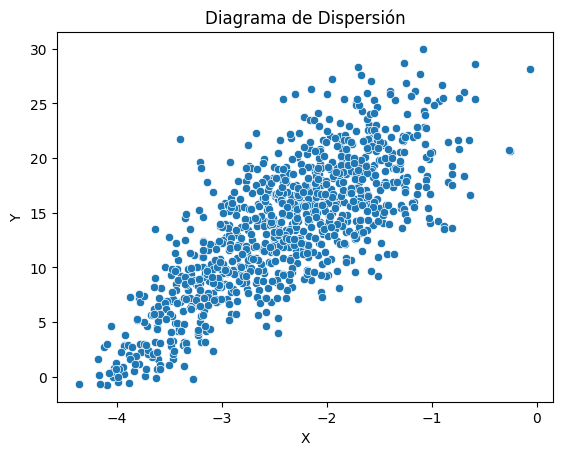

In [67]:
# Supongamos que tienes dos columnas 'x' y 'y' en tu DataFrame 'df3'

# Graficar el diagrama de dispersión
sns.scatterplot(x='X', y='Y', data=df3)

# Título del gráfico
plt.title('Diagrama de Dispersión')

# Mostrar el gráfico
plt.show()

De acuerdo al resultado del cálculo de la correlación del conjunto de datos después de la transformación, se evidencia que ahora sí las variables tienen una relación lineal según la gráfica y una alta correlación según el resultado del cálculo de la correlación, 0.77.

#### Aplicamos un modelo de regresión lineal simple al dataset al que se le aplicó la transformación.

In [68]:
# Creamos un DataFrame con datos del dataset original
df3_ = pd.DataFrame(df3)

# Separar las características (X) y las etiquetas (y)
X = df3_[['X']]
y = df3_['Y']

# Crear un modelo de regresión lineal simple
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Mostrar los coeficientes del modelo
print('Intercepto:', modelo.intercept_)
print('Coeficiente de pendiente:', modelo.coef_)

Intercepto: 28.217084742647884
Coeficiente de pendiente: [6.04932147]


In [69]:
df3.describe()

Y           X
count  977.000000  977.000000
mean    13.795814   -2.383949
std      6.068017    0.776355
min     -0.738976   -4.359151
25%      9.540022   -2.945177
50%     14.232912   -2.350440
75%     18.094371   -1.811948
max     29.978767   -0.061738

In [72]:
# Estadísticas descriptivas sobre el conjunto de datos transformado
def est_descriptivas(cols_df3):
    est_descriptivas=pd.DataFrame(cols_df3.describe())
    est_descriptivas.loc['coefVariacion']=cols_df3.std()/cols_df3.mean()
    est_descriptivas.loc['Asimetria']=skew(cols_df3)
    est_descriptivas.loc['Kurtosis']=kurtosis(cols_df3)
    return est_descriptivas

est_descriptivas(df3[["X","Y"]])

X           Y
count          977.000000  977.000000
mean            -2.383949   13.795814
std              0.776355    6.068017
min             -4.359151   -0.738976
25%             -2.945177    9.540022
50%             -2.350440   14.232912
75%             -1.811948   18.094371
max             -0.061738   29.978767
coefVariacion   -0.325659    0.439845
Asimetria       -0.083426   -0.173384
Kurtosis        -0.513124   -0.366731

#### Supuestos antes de continuar

##### Supuesto 1. Comprobar si la relación entre las variables X y Y es lineal.



Para el conjunto de datos original, no existe relación lineal entre las variables dado que los valores no tienen una distribución normal.

Después de aplicar la transformación polineal al conjunto de datos original, se puede observar en la gráfica resultante de la transformación de los puntos en la gráfica parecen caer sobre una línea recta, lo que indica que existe una relación lineal entre X y Y en el conjunto de datos resultante de la transformación, hay relación lineal.

##### Supuesto 2. Correlación entre variables

In [73]:
correlation = df3['Y'].corr(df3['X'])

# Muestra la correlación
print("Correlación entre columna1 y columna2:", correlation)

Correlación entre columna1 y columna2: 0.7739633532723579


Si la correlación es positiva (cerca de 1), significa que las dos variables tienden a aumentar o disminuir juntas.

Si la correlación es negativa (cerca de -1), significa que cuando una variable tiende a aumentar, la otra tiende a disminuir, y viceversa.

Si la correlación es cercana a cero, indica que no hay una relación lineal entre las dos variables.

En el cálculo de correlación vemos que da 0.7739633532723574, lo que significa que las dos variables del dataset df3 después de la transformación tienen una correlación positiva, es decir que tienden a aumentar o a disminuir juntas.

#### Luego del análisis de esos 2 supuestos, continuamos: Aplicando el Modelo de Regresión Lineal OLS para el Conjunto de Datos Transformado

In [74]:
df3.head()

Y         X
0  18.160671 -1.272675
1  18.157336 -1.893357
2  17.360194 -1.367126
3   6.466205 -3.270106
4   8.612596 -3.213048

In [76]:
linear_model = smf.ols(formula = 'Y ~ X', data=df3).fit()
linear_model.params

Intercept    28.217085
X             6.049321
dtype: float64

Y = 6.049321*X + 28.217085

In [77]:
linear_model.pvalues

Intercept     0.000000e+00
X            1.099044e-195
dtype: float64

In [81]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     1457.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          1.10e-195
Time:                        15:03:11   Log-Likelihood:                -2701.0
No. Observations:                 977   AIC:                             5406.
Df Residuals:                     975   BIC:                             5416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2171      0.397     71.007      0.0

In [82]:
y_predic = linear_model.predict(pd.DataFrame(df3['X']))
y_predic

0      20.518263
1      16.763558
2      19.946898
3       8.435160
4       8.780324
         ...    
994    12.915752
995    15.022747
997    16.064871
998    16.603569
999    17.502692
Length: 977, dtype: float64

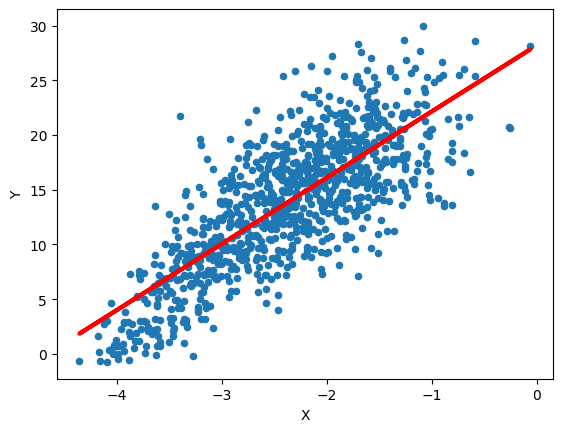

In [83]:
df3.plot(kind = 'scatter', x = 'X', y='Y')
plt.plot(pd.DataFrame(df3['X']), y_predic, c='red', linewidth=3)

Aunque en la gráfica vemos un comportamiento lineal entre las variables X y Y, no es una relación lineal perfecta, pues siguen habiendo puntos muy dispersos con relación a la recta.

#### Evaluación de los supuestos

##### 1. Independencia

In [85]:
# Evaluamos el supuesto de independencia por medio del cálculo de correlación
# entre variables

print(df3.corr())

          Y         X
Y  1.000000  0.773963
X  0.773963  1.000000


Evaluamos el supuesto de independencia entre variables por medio de la gráfica de pairplot

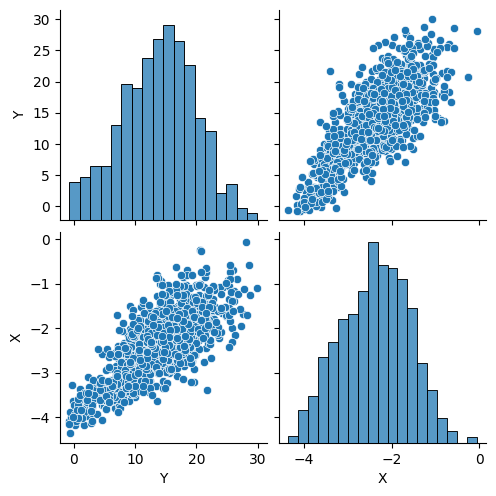

In [86]:
sns.pairplot(df3)
plt.show()

Al ver el resultado del cálculo de correlación podemos ver una correlación positiva, es decir cuando una variable crece, la variable dependiente también.

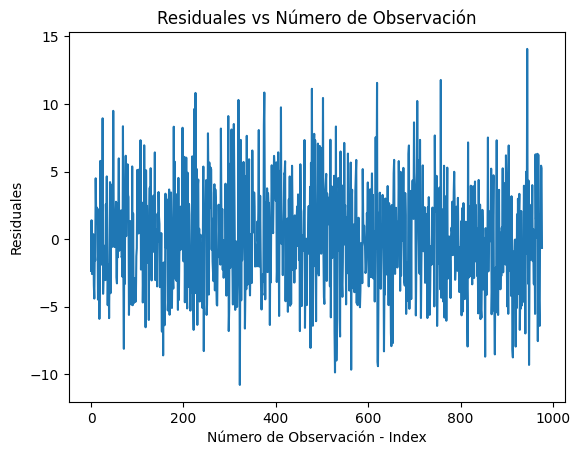

In [93]:
#Gráficamente
residuos = linear_model.resid
plt.plot(range(len(residuos)), residuos)
plt.xlabel('Número de Observación - Index')
plt.ylabel('Residuales')
plt.title('Residuales vs Número de Observación')
plt.show()

Test de Durbin-Watson: 2.0148739478823674


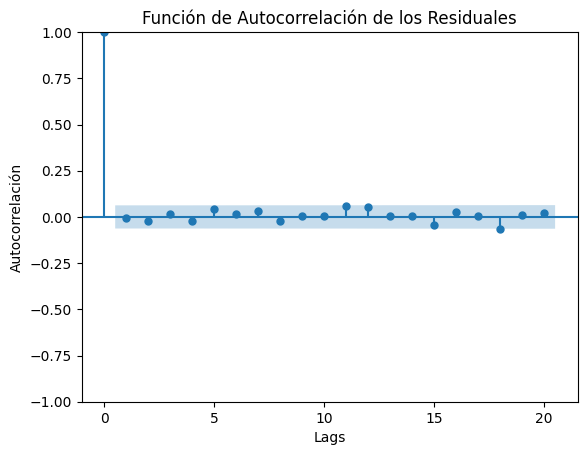

In [97]:
# Prueba de Durbin-Watson
durbin_watson_statistic = durbin_watson(residuos)
print("Test de Durbin-Watson:", durbin_watson_statistic)

# Función de Autocorrelación (ACF)
sm.graphics.tsa.plot_acf(residuos, lags=20)
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.title("Función de Autocorrelación de los Residuales")
plt.show()

In [99]:
estadistico, p_valor = shapiro(df3)
print("Estadístico de Shapiro-Wilk:", estadistico)
print("P-valor:", p_valor)

Estadístico de Shapiro-Wilk: 0.8419552445411682
P-valor: 2.3309058525732575e-40


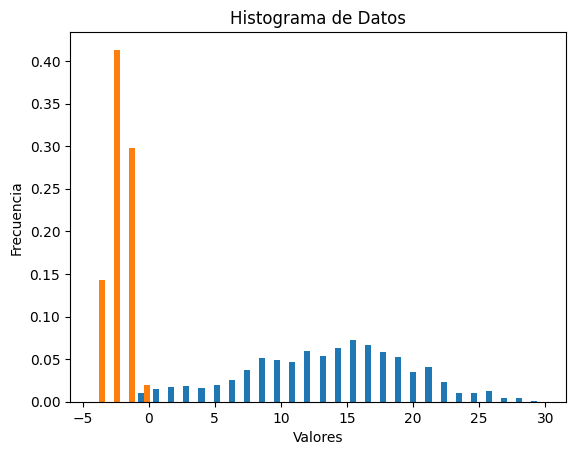

In [100]:
plt.hist(df3, bins=30, density=True)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de Datos')
plt.show()

La evaluación visual de la independencia de los residuos indica que no se observan estructuras diferentes en la dispersión de los residuos a lo largo de las observaciones o el tiempo.

El diagrama de dispersión de los residuos respecto al número de observación muestra una distribución aleatoria, sin señal de asociación.

##### 2. Normalidad en la distribución de los residuales

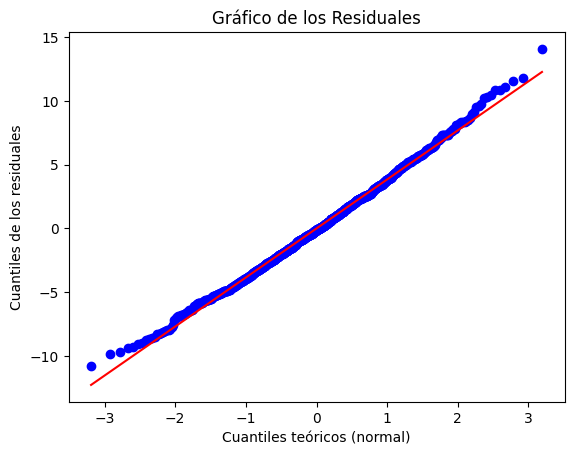

In [101]:
# Graficamos los residuales de la distribución
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Gráfico de los Residuales')
plt.xlabel('Cuantiles teóricos (normal)')
plt.ylabel('Cuantiles de los residuales')
plt.show()

In [102]:
#Aplicar Test de Shapiro-Wilk a los residuales
shapiro_test = shapiro(residuos)
print("Estadística Test:", shapiro_test[0])
print("p:", shapiro_test[1])

Estadística Test: 0.9967342615127563
p: 0.04135444015264511


El resultado que nos muestra el test de Shapiro-Wilk es alto (0.996734) y el gráfico de los residuales muestra una línea diagonal, lo cual indica que los residuos se ajustan a una distribución normal.

En esta prueba el valor de p nos indica que hay alguna desviación de la normalidad, sin embargo se evidencia que los residuos están cerca de tener una distribución normal.

Por consiguiente, resultaría apropiado considerar la normalidad en la distribución de los residuos para los propósitos en la práctica del análisis de regresión.

##### 3. valor esperado de residual igual a cero ( Media cero)

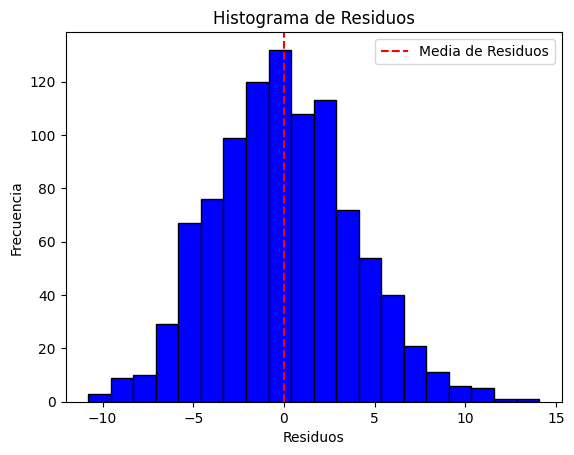

In [107]:
# Histograma de los residuales de la distribución
plt.hist(residuos, bins=20, color='blue', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.axvline(x=residuos.mean(), color='red', linestyle='--', label='Media de Residuos')
plt.legend()
plt.show()

In [105]:
# One-Sample T-Ttest
t_statistic, p_valor = stats.ttest_1samp(residuos, 0)

# Imprimir los resultados de la prueba
print("Estadistica t:", t_statistic)
print("p:", p_valor)

Estadistica t: 2.603077339775289e-15
p: 0.999999999999998


In [106]:
# media de los residuos
media_residuos = residuos.mean()
print("Media de los residuos:", media_residuos)

Media de los residuos: 3.199987755726142e-16


En histograma podemos ver que la línea punteada roja está cerca a cero, con lo cual se concluye que la distribución de los residuos es cercana a cero en la gráfica.

Teniendo en cuenta que el es cercano a 1 (0.99), podemos decir que los datos proporcionan evidencia de que la media de los residuos es cero.

##### 4. varianza constante no conocida de los residuales

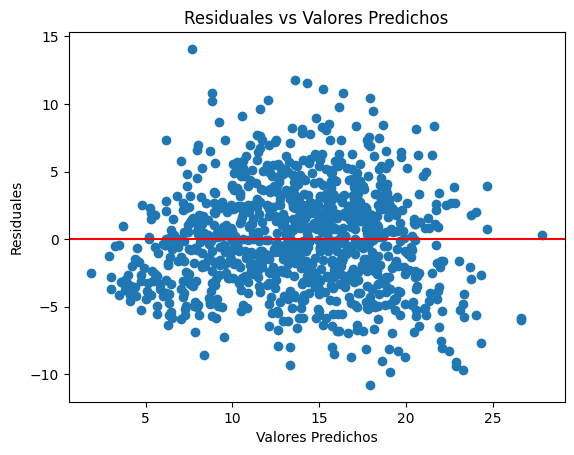

In [108]:
plt.scatter(linear_model.fittedvalues, residuos)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Predichos')

# Línea de referencia en cero
plt.axhline(y=0, color='red', linestyle='-')
plt.show()

El supuesto de homocedasticidad no dice que los errores deberían tener una dispersión similar en todas las áreas de la gráfica, independientemente de los valores ajustados,
pero si el patrón circular está alrededor de una línea central, esto sugiere que la dispersión de los errores no es constante en todas las áreas de la gráfica.

Parece ser entonces que el supuesto de homocedasticidad no se cumple en el modelo de regresión.

### Ejercicio No. 3 - Considere el conjunto de datos “Wine Quality” del fichero datos.xls.

Defina como variable respuesta (Y) la columna Densidad y elimine las variables pH, Sulfatos, Cloruros, Acidez Volátil, Acidez Fija y Calidad de Vino.



In [137]:
# Lectura del conjunto de datos
df = pd.read_excel('/content/datos.xls', sheet_name = 'Wine Quality', decimal = ',', header=2)
#Observamos la configuracion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calidad del Vino         4898 non-null   int64  
 1   Acidez Fija              4898 non-null   float64
 2   Acidez Volátil           4898 non-null   float64
 3   Ácido Cítrico            4898 non-null   float64
 4   Azúcar Residual          4898 non-null   float64
 5   Cloruros                 4898 non-null   float64
 6   Dióxido de Azúfre Libre  4898 non-null   float64
 7   Dióxido de Azúfre Total  4898 non-null   float64
 8   Densidad                 4898 non-null   float64
 9   pH                       4898 non-null   float64
 10  Sulfatos                 4898 non-null   float64
 11  Alcohol                  4898 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [138]:
# Observamos sus encabezados y primeros 5 regsitros, se verifica la organización de los datos
df.head()

Calidad del Vino  Acidez Fija  Acidez Volátil  Ácido Cítrico  \
0                 6          7.0            0.27           0.36   
1                 6          6.3            0.30           0.34   
2                 6          8.1            0.28           0.40   
3                 6          7.2            0.23           0.32   
4                 6          7.2            0.23           0.32   

   Azúcar Residual  Cloruros  Dióxido de Azúfre Libre  \
0             20.7     0.045                     45.0   
1              1.6     0.049                     14.0   
2              6.9     0.050                     30.0   
3              8.5     0.058                     47.0   
4              8.5     0.058                     47.0   

   Dióxido de Azúfre Total  Densidad    pH  Sulfatos  Alcohol  
0                    170.0    1.0010  3.00      0.45      8.8  
1                    132.0    0.9940  3.30      0.49      9.5  
2                     97.0    0.9951  3.26      0.44     10.1  
3                    186.0    0.9956  3.19      0.40      9.9  
4                    186.0    0.9956  3.19      0.40      9.9

In [139]:
# Verificamos sus columnas y su sintaxis para proceder posterior a elimnar las que nos solicitan
df.columns

Index(['Calidad del Vino', 'Acidez Fija', 'Acidez Volátil', 'Ácido Cítrico',
       'Azúcar Residual', 'Cloruros', 'Dióxido de Azúfre Libre',
       'Dióxido de Azúfre Total', 'Densidad', 'pH', 'Sulfatos', 'Alcohol'],
      dtype='object')

In [140]:
#Se eliminan las columnas de datos indicadas y se especifica que los cambios
# sean realizados sobre el dataframe original
cols = ['pH', 'Sulfatos', 'Cloruros', 'Acidez Volátil', 'Acidez Fija', 'Calidad del Vino']
df.drop(cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ácido Cítrico            4898 non-null   float64
 1   Azúcar Residual          4898 non-null   float64
 2   Dióxido de Azúfre Libre  4898 non-null   float64
 3   Dióxido de Azúfre Total  4898 non-null   float64
 4   Densidad                 4898 non-null   float64
 5   Alcohol                  4898 non-null   float64
dtypes: float64(6)
memory usage: 229.7 KB


#### Estandarización de las variables y división de datos

In [141]:
# Selección de variables dependiente (Densidad) e independientes
Y = df['Densidad']
X = df.drop('Densidad',axis=1)

In [142]:
#División de datos de entrenamiento y de prueba segun la ponderación 80-20 respectivamente
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [143]:
# Esta linea instancia la clase que va a calcular la estandarización
scalerX = StandardScaler()
# Ajustamos el scaler a los datos de entrenamiento
scalerX.fit(X_train)
# Se realiza la transformación
datosX_scaled = scalerX.transform(X_train)
dfX_scaled = pd.DataFrame(datosX_scaled, columns = X_train.columns)

# Esta linea instancia la clase que va a calcular la estandarización
scalerY = StandardScaler()
# Ajustamos el scaler a los datos de entrenamiento en Y
scalerY.fit(y_train.values.reshape(-1,1))
# Así calculo la estandarización de los datos
dfY_scaled = scalerY.transform(y_train.values.reshape(-1,1))

In [144]:
# Se deja en la primera columna del dataframe a la variable dependiente
df_scaled = dfX_scaled.copy()
# Cambia la dimensión de 'Densidad' en forma de columna
df_scaled['Densidad'] = dfY_scaled.reshape(1, -1)[0]

In [145]:
dfX_scaled

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0          0.227731         0.340419                 0.534065   
1          0.895832         1.002071                 0.773947   
2         -0.022807         0.184737                -0.605377   
3          0.144218        -0.924503                -0.125612   
4         -0.607396         2.432407                 0.054300   
...             ...              ...                      ...   
3913       1.563933         0.009594                -0.425465   
3914      -0.106320         0.496102                 1.133771   
3915       1.563933        -0.632598                -0.425465   
3916      -0.356858         1.410739                 1.073800   
3917       0.144218        -0.924503                 0.174241   

      Dióxido de Azúfre Total   Alcohol  
0                   -0.641932  1.540371  
1                    1.355106 -0.821712  
2                   -1.022320  0.481506  
3                   -0.879675  0.237153  
4                    0.855846 -0.088652  
...                       ...       ...  
3913                -0.356641 -0.495907  
3914                 0.071295 -0.903163  
3915                 0.332812  0.725860  
3916                -0.095124  0.074251  
3917                -0.832126 -0.088652  

[3918 rows x 5 columns]

In [146]:
df_scaled.head()

Ácido Cítrico  Azúcar Residual  Dióxido de Azúfre Libre  \
0       0.227731         0.340419                 0.534065   
1       0.895832         1.002071                 0.773947   
2      -0.022807         0.184737                -0.605377   
3       0.144218        -0.924503                -0.125612   
4      -0.607396         2.432407                 0.054300   

   Dióxido de Azúfre Total   Alcohol  Densidad  
0                -0.641932  1.540371 -0.447041  
1                 1.355106 -0.821712  0.903370  
2                -1.022320  0.481506 -0.460280  
3                -0.879675  0.237153 -0.304718  
4                 0.855846 -0.088652  1.883079

In [147]:
# Se realiza el cambio de columnas
cols = df_scaled.columns.tolist()
cols[5],cols[0] = cols[0],cols[5]
df_est = df_scaled[cols]
df_est.head()

Densidad  Azúcar Residual  Dióxido de Azúfre Libre  \
0 -0.447041         0.340419                 0.534065   
1  0.903370         1.002071                 0.773947   
2 -0.460280         0.184737                -0.605377   
3 -0.304718        -0.924503                -0.125612   
4  1.883079         2.432407                 0.054300   

   Dióxido de Azúfre Total   Alcohol  Ácido Cítrico  
0                -0.641932  1.540371       0.227731  
1                 1.355106 -0.821712       0.895832  
2                -1.022320  0.481506      -0.022807  
3                -0.879675  0.237153       0.144218  
4                 0.855846 -0.088652      -0.607396

#### Matrices de Correlación

A continuación se realiza tres mapas de calor para representar las matrices de correlación de Pearson,Spearman y Kendall de una forma que sea más facil identificar las relaciones lineales debiles, moderadas y perfectas

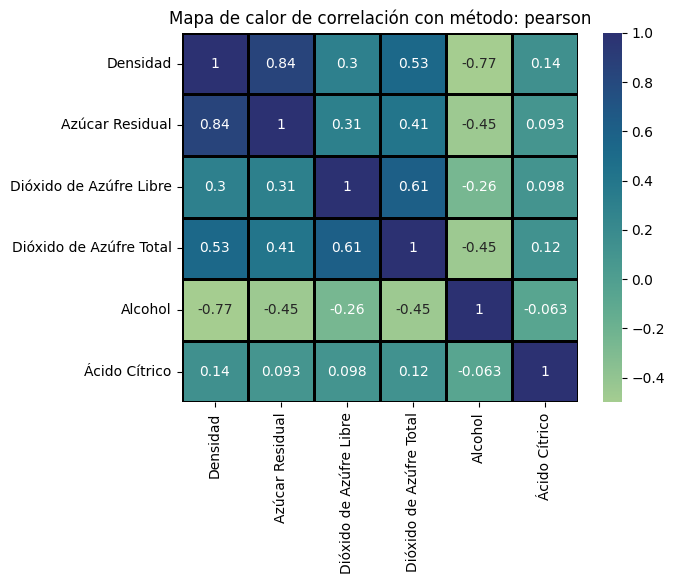

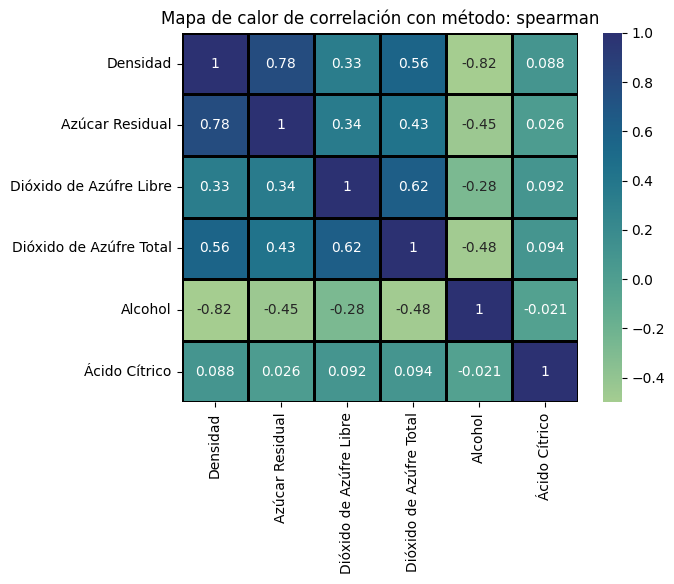

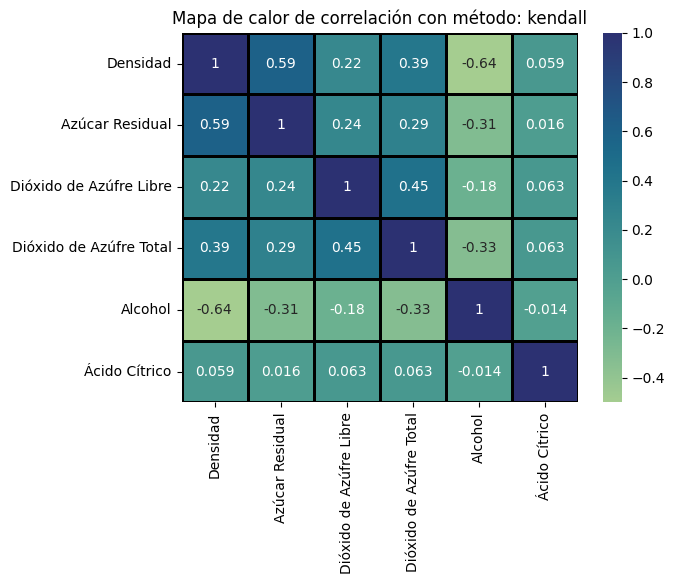

In [148]:
# Construcción de ciclo que tiene como fin mostrar los tres
# diferentes tipos de correlación a través de un mapa de calor
methods = ['pearson','spearman','kendall']

for method in methods:
  plt.title(f'Mapa de calor de correlación con método: {method}')
  # Se establecen parametros de visualización como el color de la linea , grosor de linea
  # y rangos en los cuales los colores cambian de intensidad
  sns.heatmap(df_est.corr(method=method),annot=True,cmap='crest',linewidths=2,linecolor='black',
              vmin=-0.5,vmax=1,cbar=True)
  plt.show()

#### ¿Qué diferencia encuentra entre las estructuras de dependencias obtenida?

En primer lugar, la diferencia más notoria es con la matriz de correlación de Pearson tiene relaciones de dependencia más altas en comparación con las matrices de Spearman y Kendall, esto en parte se debe que puede estar captando falsas relaciones lineales por atípicos multivariantes y univariantes.

La matriz de Kendall subestimó las relaciones que habían entre las variables y esto se debe a su naturaleza no parámetrica y que no hace supuestos sobre los datos.

Para hacer un analisis más detallado se va a hacer uso del siguiente grupo de graficas realizado con Seaborn para entender visualmente las relaciones entre variables y compararlas con las estimaciones según su comportamiento.

#### Relaciones a analizar

El siguiente análisis se hará sobre las variables de entrada con respecto a la de salida ('Densidad')

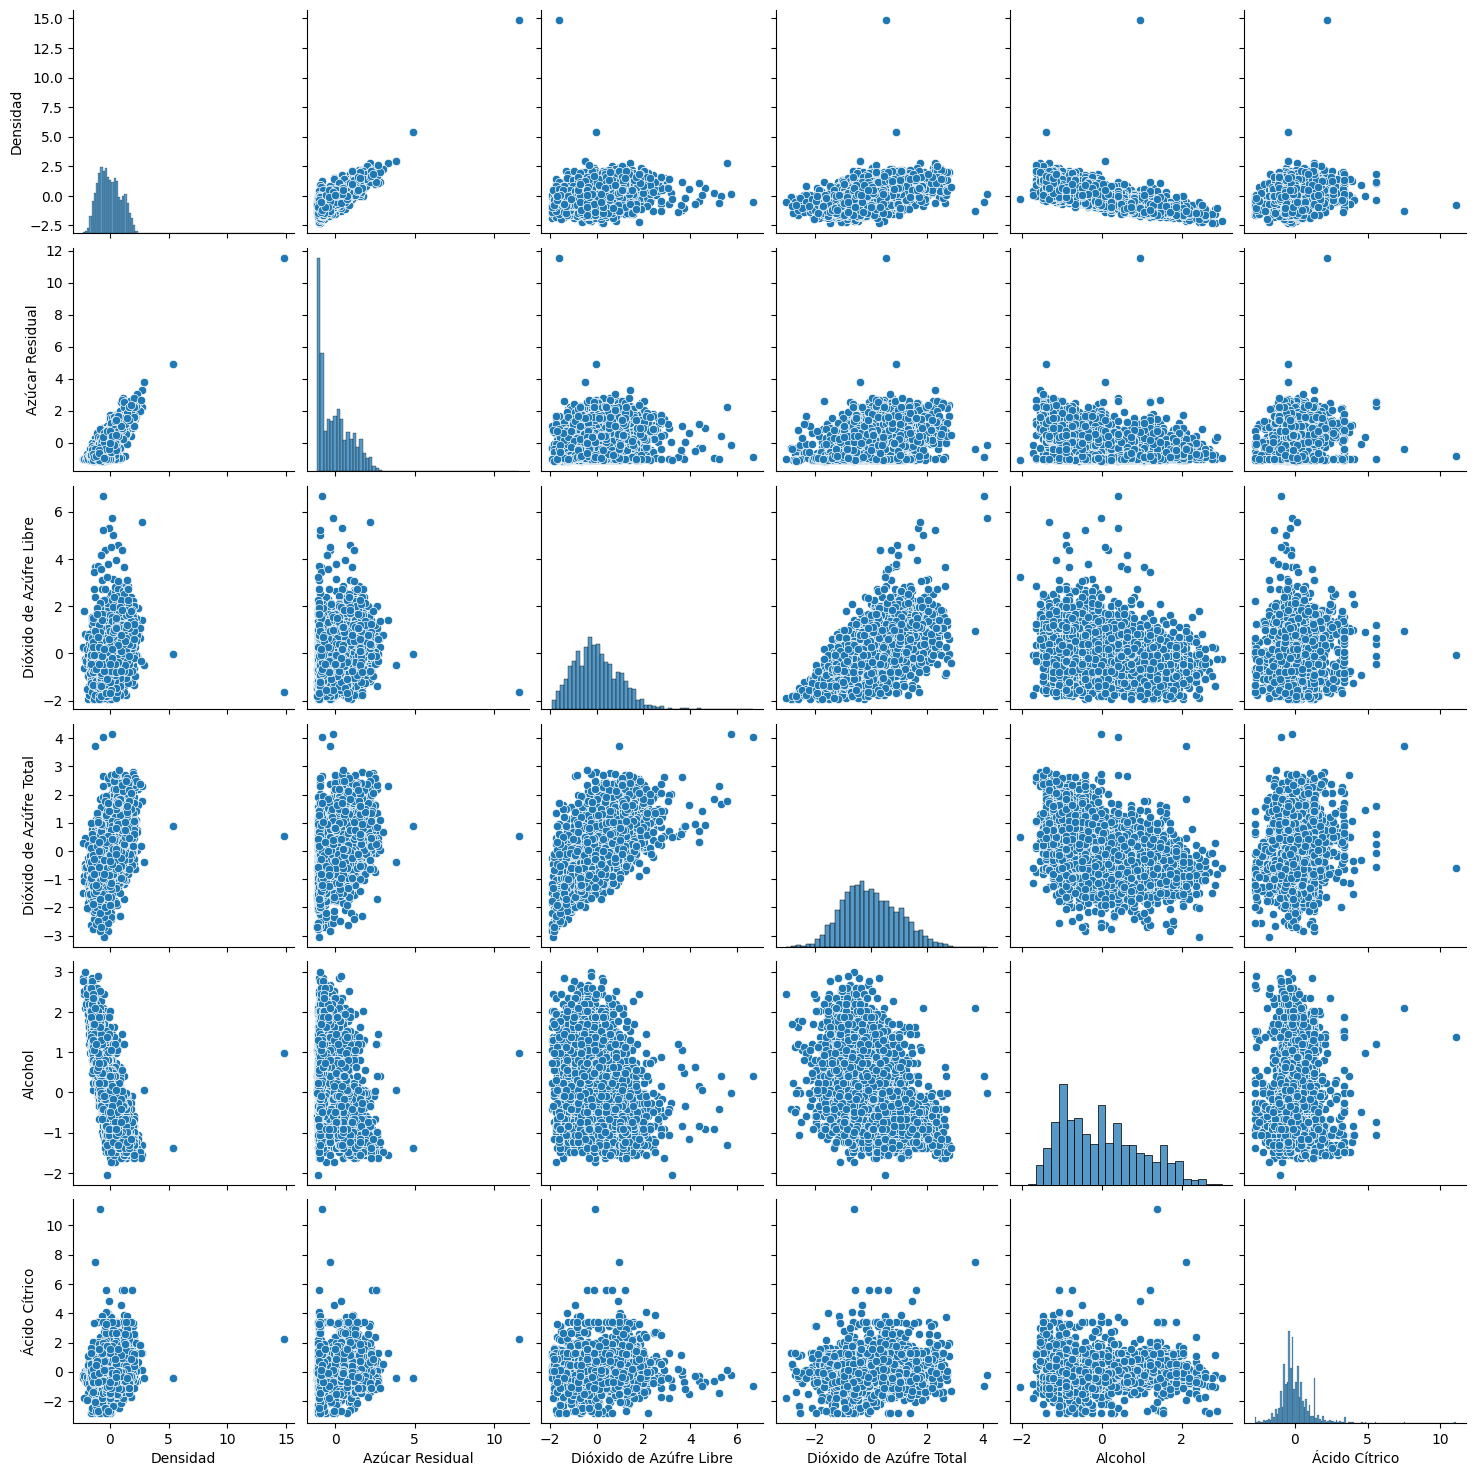

In [149]:
# Se realiza la visualización de la matriz de gráficas de dispersión para apoyar el
# analisis de las matrices de correlación
sns.pairplot(df_est)

In [150]:
def anomalias(x, y):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6),
    gridspec_kw={'height_ratios': [3, 1], 'width_ratios': [1, 3]})

    # Boxplot en el eje superior
    ax1.boxplot(y, vert=True)

    # Diagrama de dispersión
    ax2.scatter(x, y, s=5)

    # Boxplot en el eje inferior
    ax4.boxplot(x, vert=False)

    # Ocultar ejes
    ax3.axis('off')
    ax1.axis('off')
    ax4.axis('off')

    # Ajustar el espacio entre los subgráficos
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()

def graficar(df_est,var,n_delete=False,method='pearson'):
  print(f'{var}')
  prov = df_est[[var,'Densidad']]
  prov = prov.sort_values(by=var)

  if n_delete is False:
    prov = prov.iloc[:,:]
    anomalias(prov[var],prov['Densidad'])
  else:
    n_delete = n_delete*-1
    prov = prov.iloc[:n_delete,:]
    anomalias(prov[var],prov['Densidad'])


  print(prov.corr(method))
  print('')
  print(f'El ultimo dato de la variable {var} es: {prov[var].iloc[-1]}')

In [151]:
# Establecemos variables a analizar en var
var = df_est.drop('Densidad',axis=1).columns

##### Azúcar residual VS Densidad

Según la matriz de correlación de Pearson se evidencia que la variable "Azucar residual" es la variable que representa mayor correlación con respecto a la variable de respuesta "Densidad" siendo esta un valor de 0.84 (Correlación fuerte), se espera que esta variable tenga un coeficiente de mayor impacto dentro de la ecuación de regresión lineal estimada a partir de la ecuación de correlación

Se puede visualizar en la siguiente gráfica que hay una relación lineal moderada-fuerte, alta varianza en los valores más bajos de la variable "Azucar" con respecto a la variable de respuesta y se presentan atípicos bivariantes, siendo uno de ellos extremo, de tal manera que si se extrae disminuye un punto porcentual en las siguientes lineas de codigo. Cuando se extraen los siguientes datos atipicos no hay variación significativa debido a que no son extremos ni tampoco son una gran densidad de puntos por lo tanto Pearson no fue tan afectada por estas anomalías

Azúcar Residual


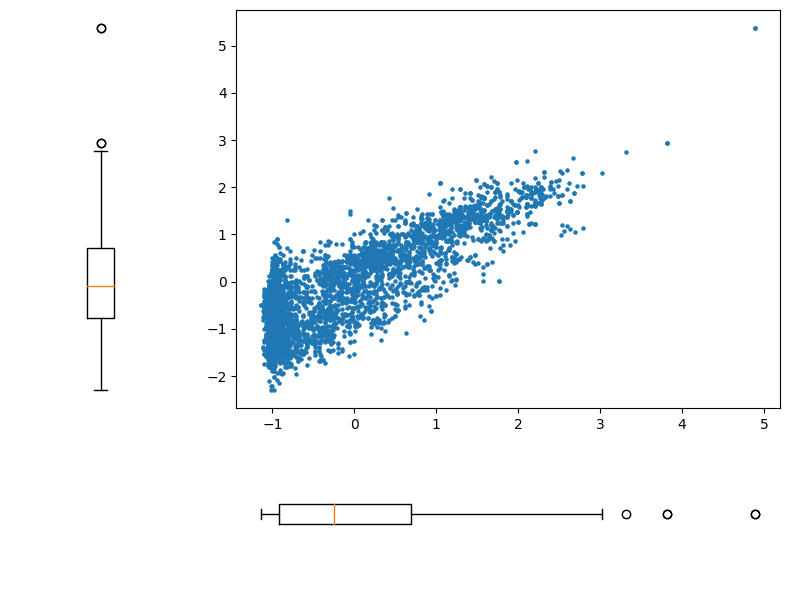

                 Azúcar Residual  Densidad
Azúcar Residual         1.000000  0.837146
Densidad                0.837146  1.000000

El ultimo dato de la variable Azúcar Residual es: 4.894140496538503


In [152]:
graficar(df_est,var=var[0],n_delete=1)

##### Dióxido de azufre libre VS Densidad

Graficamente se puede visualizar hay relación debil, se logra pronunciar una relación eliptica pero esta se encuentra de forma casi horizontal lo que indica que el cambio en la variable "Dióxido de azufre libre" no tiene tanto impacto como la variable "Azucar Residual" y por ello es la segunda variable con menos correlación dentro de las tres matrices de correlación con respecto a la variable de respuesta donde se obtuvieron los siguientes valores Spearman: 0.3, Pearson: 0.33 (Es posible que se haya captado relaciones no lineales) y Kendall: 0.22 que naturalmente tiende a subestimar las correlaciones.

Se presentan una gran cantidad de atipicos sobre la variable de entrada pero estos siguen con la tendencia de los datos así que no afecta en gran medida el calculo de las correlaciones.

Dióxido de Azúfre Libre


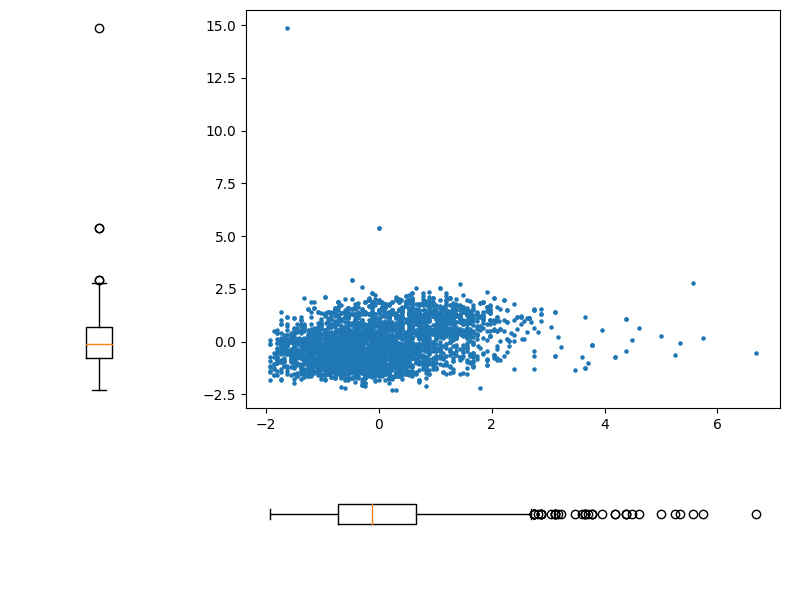

                         Dióxido de Azúfre Libre  Densidad
Dióxido de Azúfre Libre                 1.000000  0.299829
Densidad                                0.299829  1.000000

El ultimo dato de la variable Dióxido de Azúfre Libre es: 6.681053842118569


In [153]:
graficar(df_est,var=var[1],n_delete=False)

##### Dióxido de azufre Total VS Densidad

Según las matrices de correlación calculadas se evidencia que el Dióxido de azufre total tiene una relación moderada con la variable de respues según Pearson y Spearman con valores de 0.53 y 0.56 respectivamente, mientras que Kendall subestimó nuevamente la correlación con un valor de 0.39 siendo considerada como una relación debil

Gráficamente se observa un comportamiento eliptico con baja varianza pero nuevamente un poco inclinada horizontalmente, por lo tanto el cambio de la variable de entrada con la de salida es de moderado efecto.

Dióxido de Azúfre Total


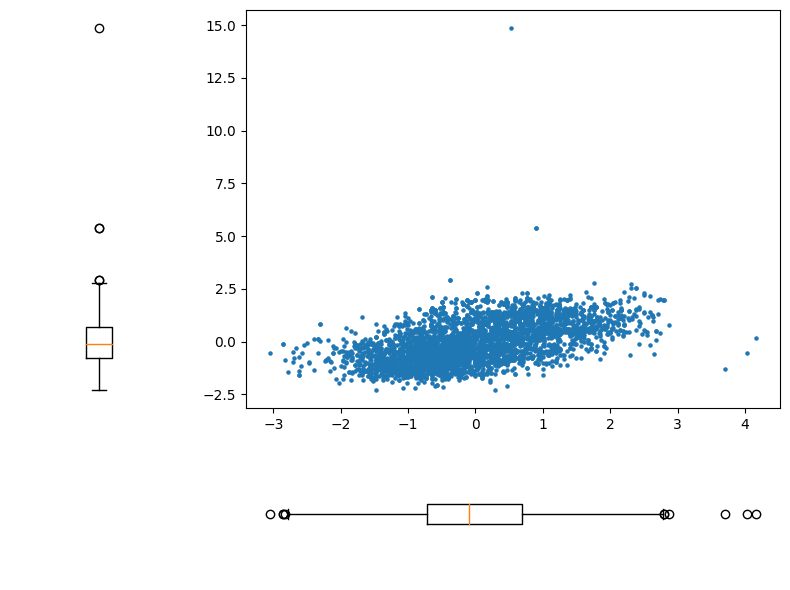

                         Dióxido de Azúfre Total  Densidad
Dióxido de Azúfre Total                 1.000000  0.531515
Densidad                                0.531515  1.000000

El ultimo dato de la variable Dióxido de Azúfre Total es: 4.160468151507182


In [154]:
graficar(df_est,var=var[2])

##### Alcohol VS Densidad

Se puede observar dentro de las correlaciones calculadas que con el método de Pearson y Kendall esta variable es la segunda con mayor correlación con respecto a la variable de salida en comparación con el método de Spearman que captó las relaciones lineales y esto se debe a que la relación indica monotinicidad de forma decreciente lo cual es bien captado por el método de Spearman dandole un valor de -0.82 siendo la variable con la relación más fuerte con respecto a la variable de salida dentro de la matriz de correlación de Spearman.

Algo particular de esta relación es que se puede evidenciar que hay ciertos valores constantes de alcohol que tienen diferente densidad y esto puede deber que hay posibles agrupamientos de datos.

Alcohol


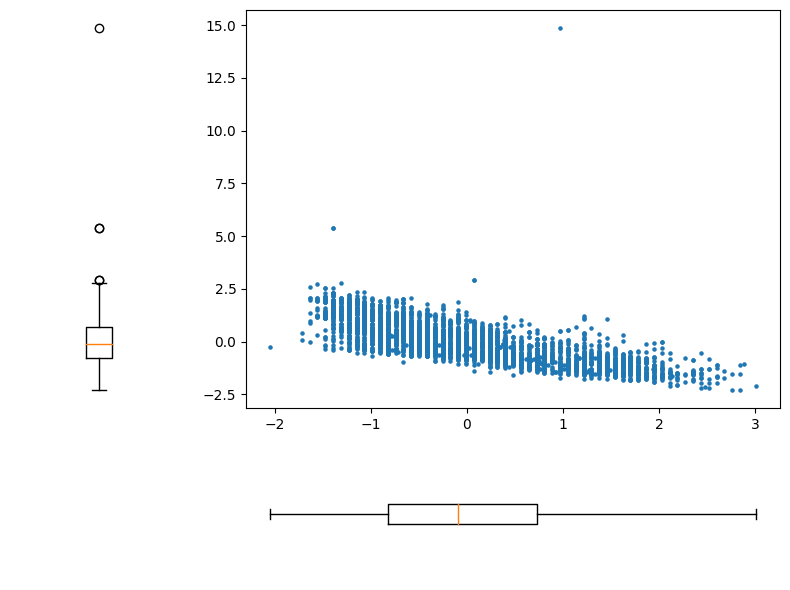

           Alcohol  Densidad
Alcohol   1.000000 -0.774568
Densidad -0.774568  1.000000

El ultimo dato de la variable Alcohol es: 3.006491445721067


In [155]:
graficar(df_est,var=var[3])

##### Ácido cítrico VS Densidad

Se puede observar dentro de las correlaciones calculadas que con el método de Spearman y Kendall se subestimó las correlaciones de esta variable con respecto a la variable "Densidad" en comparación con el método de Pearson y esto debe a que posiblemente los datos atipicos univariantes afectaron el calculo del mismo, mientras que por la naturaleza no parámetrica de la correlación de Kendall y Spearman se presentan coeficientes más bajos en comparación a los otros dos métodos.

Cabe destacar que para los tres métodos, la relación es debil solo que Pearson se ve sesgado por los datos atipicos de la cola izquierda y derecha de la variable "Ácido Cítrico" identificando una correlación un poco más alta en comparación con los demás métodos que subestimaron las correlaciones y esto tiene sentido cuando se analiza la concentración de puntos sobre la media bivariante, donde claramente se visualiza una relación esferica que indica que no hay dependencia entre las variables.



Ácido Cítrico


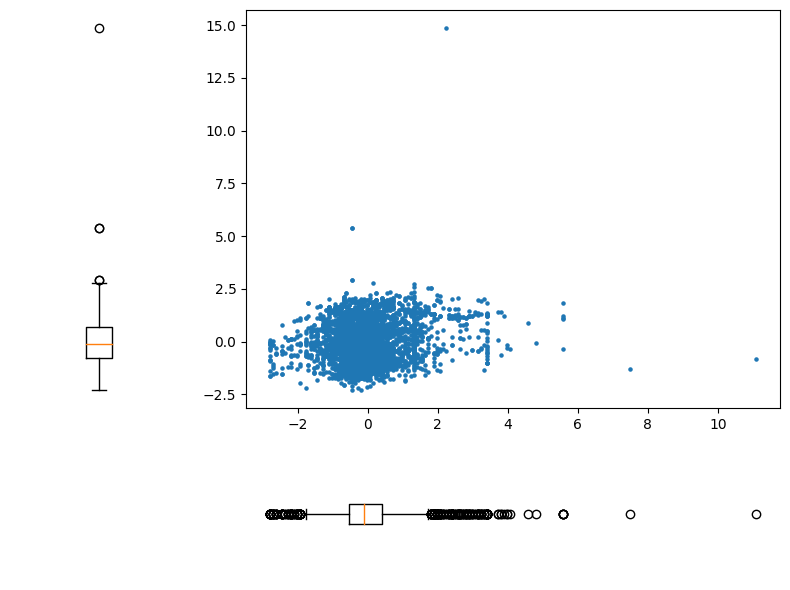

               Ácido Cítrico  Densidad
Ácido Cítrico       1.000000  0.143225
Densidad            0.143225  1.000000

El ultimo dato de la variable Ácido Cítrico es: 11.084375005884791


In [156]:
graficar(df_est,var=var[4])

#### Detección y limpieza de atípicos

In [157]:
def detectar_atipicos(datos):
    # Calcular el primer y tercer cuartil
    q1 = np.percentile(datos, 25)
    q3 = np.percentile(datos, 75)

    # Calcular el rango intercuartil
    iqr = q3 - q1

    # Definir los límites para los valores atípicos
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Encontrar los valores atípicos
    atipicos_indices = np.where((datos < limite_inferior) | (datos > limite_superior))
    return atipicos_indices[0]

X = df_est['Ácido Cítrico']
Y = df_est['Densidad']
# Detectar valores atípicos en X
indices_atipicos = detectar_atipicos(X)

# Eliminar valores atípicos de X
X_sin_atipicos = np.delete(X, indices_atipicos)

# Eliminar los valores correspondientes en Y
Y_sin_atipicos = np.delete(Y, indices_atipicos)

#### Entrenamiento de modelos de regresión


Antes de entrenar los modelos a partir de las matrices de correlación, se va a entrenar un modelo de regresión lineal OLS con el fin de identificar que variables son representativas para el modelo

In [158]:
model = sm.OLS(df_est['Densidad'],dfX_scaled)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               Densidad   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              8464.
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                        0.00
Time:                        15:43:37   Log-Likelihood:                         -721.97
No. Observations:                3918   AIC:                                      1454.
Df Residuals:                    3913   BIC:                                      1485.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Como se puede observar, todos los coeficientes son significativos debido a que el p_value de la prueba t arrojó un valor de 0 a excepción del coeficiente b0. No se realiza eliminación de variables y se continúa con los siguientes pasos en donde se determina que

$$\beta_0 = 0$$

Si los datos que se van a usar para el modelo de regresión se encuentran estandarizados o pasan por un preprocesamiento que los estandariza, podemos calcular los coeficientes regresión directamente con la matrix de correlaciones $C$ de la sigueinte form

$$\beta_{1\ldots p}=C_{XX}^{-1}C_Xy \hspace{1 cm} \beta_0=0$$

En este punto ya se ha hecho la partición de los datos desde los primeros pasos debido a que se debe calcular la media y desviación estandar de las variables de entrenamiento tanto de entrada como las de salida, de tal manera que cuando se requiera utilizar el modelo con datos nuevos, se debe estandarizar las variables de entrada con la media y desviación almacenados.

In [159]:
def RLC(df_scaled, method_name):
  C = df_scaled.corr(method = method_name)

  CXX = C.to_numpy()[1:, 1:]

  CXy = C.to_numpy()[1:, 0]

  betas = np.matmul(np.linalg.inv(CXX), CXy)

  return betas

In [160]:
# Se ejecuta las funciones para el respectivo calculo de los betas del modelo de regresión
# lineal con las matrices de correlación
betas_pearson = RLC(df_est,methods[0])
betas_spearman = RLC(df_est,methods[1])
betas_kendall = RLC(df_est,methods[2])

betas = pd.DataFrame({'Betas Pearson':betas_pearson,
                      'Betas Spearman':betas_spearman,
                      'Betas Kendall':betas_kendall})

Compare e interprete los valores de los coeficientes de regresión obtenidos por cada método

*     Coeficientes de regresión Pearson: Se logra confirmar la interpretación realizada con respecto a las matrices de correlación donde se tenía la hipotesis de que las variables estandarizadas que tuvieran mayor impacto en la variable de respuesta estandarizada son las variables "Ázucar Residual" y "Alcohol", donde el beta que representa "Ázucar Residual" tuvo un coeficiente más alto con respcto a los otros métodos.

*     Coeficientes de regresión Spearman: En este caso las mismas variables estandarizadas son las que tienen mayor impacto en la variable estandarizada del modelo de RLM ajustado a partir de la matriz de correlación de Spearman solo que en este caso la que tiene mayor impacto es la variable estandarizada "Alcohol" lo cual fue visto en la matriz de correlación de Spearman cuando se estaba interpretando anteriormente.

*     Coeficiente de de regresión Kendall: Igualmente que con Spearman la variable estandarizada de mayor impacto fue el alcohol, inclusive logra tener mayor impacto  en comparación con el coeficiente calculado a partir de Pearson y esto se debe a que Kendall pudo captar un poco más el comportamiento que tenía la variable, con tendencia decreciente y de forma monótona; los demás coeficientes fueron subestimados en comparación con los otros métodos como era de esperarse.

#### ¿Como interpretar los coeficientes?


In [161]:
betas['betas']=['b1','b2','b3','b4','b5']
betas['Variable'] = df_est.iloc[:,1:].columns

betas

Betas Pearson  Betas Spearman  Betas Kendall betas                 Variable
0       0.604628        0.502592       0.413887    b1          Azúcar Residual
1      -0.083398       -0.082686      -0.023793    b2  Dióxido de Azúfre Libre
2       0.120119        0.128018       0.122039    b3  Dióxido de Azúfre Total
3      -0.464001       -0.557514      -0.472005    b4                  Alcohol
4       0.051549        0.058673       0.039300    b5            Ácido Cítrico

Como las variables independientes y dependiente fueron estandarizadas, la interpretación se debe hacer bajo esa transformación de los datos y para ello se escogen los coeficientes que són más significativos para la variable de respuesta del modelo de RLM estimado a partir de las tres matrices de correlación calculadas previamente:

**Coeficientes de regresión Pearson de mayor impacto:**

$$\beta_1=0.6046$$

Por cada incremento de la variable estandarizada "Ázucar Residual" suponiendo el resto de variables constantes, se espera un incremento de 0.6046 unidades con respecto a la variable de respuesta estandarizada (Densidad)

$$\beta_4=-0.464$$

Por cada incremento de la variable estandarizada "Alcohol" suponiendo el resto de variables constantes, se espera un decrecimiento de -0.464 unidades con respecto a la densidad estandarizada

**Coeficientes de regresión Spearman de mayor impacto:**

$$\beta_4=-0.5575$$

Por cada incremento de la variable estandarizada "Alcohol" suponiendo el resto de variables constantes, se espera un decrecimiento de -0.5575 unidades con respecto a la variable de respuesta densidad estandarizada.

$$\beta_1=0.5025$$

Por cada incremento de la variable estandarizada "Ázucar Residual" suponiendo el resto de variables constantes, se espera un incremento de 0.6046 unidades con respecto a la variable de respuesta estandarizada (Densidad)

**Coeficientes de regresión Kendall de mayor impacto:**

$$\beta_4=-0.472$$

Por cada incremento de la variable estandarizada "Alcohol" suponiendo el resto de variables constantes, se espera un decrecimiento de -0.5575 unidades con respecto a la variable de respuesta densidad estandarizada.

$$\beta_1=0.4138$$

Por cada incremento de la variable estandarizada "Ázucar Residual" suponiendo el resto de variables constantes, se espera un incremento de 0.6046 unidades con respecto a la variable de respuesta estandarizada (Densidad)

#### Cálculo de errores

Realice una predicción con los datos de prueba de acuerdo a los modelos ajustados y calcule
el RMSE √MSEde la predicción

¿Cuál de los modelos lineales propuestos predice mejor?

In [162]:
# Se realiza el calculo de las predicciones
X_test_scaled = scalerX.transform(X_test) #Primero se estandariza los X de prueba

# Predicciones
def pred(x,betas):
  preds = np.matmul(x, betas)
  return preds

predicts_pearson = pred(X_test_scaled,betas_pearson)
predicts_spearman = pred(X_test_scaled,betas_spearman)
predicts_kendall = pred(X_test_scaled,betas_kendall)

In [163]:
#Se transforma la variable y_test para poder calcular los errores
y_test_scaled = scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

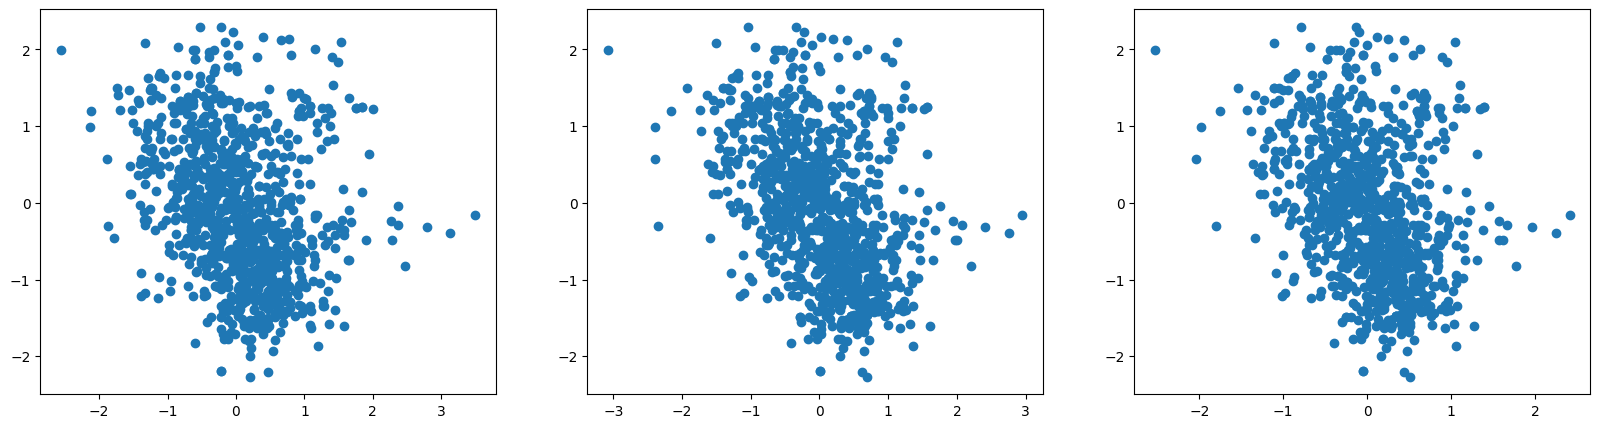

In [164]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.scatter(predicts_pearson, y_test_scaled)
ax2.scatter(predicts_spearman, y_test_scaled)
ax3.scatter(predicts_kendall, y_test_scaled)
fig.show()

In [165]:
#Se calcula el respectivo error cuadratico medio y se le calcula la raiz
mse_pearson = (mean_squared_error(y_test_scaled,predicts_pearson))**1/2
mse_spearman = (mean_squared_error(y_test_scaled,predicts_spearman))**1/2
mse_kendall = (mean_squared_error(y_test_scaled,predicts_kendall))**1/2

print(f'RMSE Pearson: {mse_pearson} , RMSE Spearman: {mse_spearman}, RMSE Kendall: {mse_kendall}')

RMSE Pearson: 0.9321533143547475 , RMSE Spearman: 0.9889452589154686, RMSE Kendall: 0.8114960343991772


¿Cuál de los modelos lineales propuestos predice mejor?


Según el calculo del RMSE, el modelo de regresión lineal que presenta mejores predicciones es el modelo que tiene como base la matriz de correlación de Kendall, pero gráficamente se visualiza que las predicciones y los datos de prueba de la variable de prueba presentan mucha diferencia entre sí, lo que indica que no hay un buen ajuste del modelo y esto es confirmado por el RMSE que a pesar de ser la raiz cuadrada del RMSE arrojó un error relativamente alto teniendo en cuenta las escalas que se están utilizando debido a que se hizo la respectiva transformación de los datos.

#### Verificación de los supuestos

Valide los supuestos teóricos de cada modelo
εi iid∼ N(0, σ2) y concluya.

In [166]:
# Creación de función de error
def error(y,predict):
  error = y - predict
  return error

In [167]:
residuales = predicts_pearson - scalerY.transform(y_test.values.reshape(-1, 1)).reshape(1, -1)[0]

In [169]:
# Calculo del error con cada uno de los modelos
error_pearson = error(y_test_scaled,predicts_pearson)
error_spearman = error(y_test_scaled,predicts_spearman)
error_kendall = error(y_test_scaled,predicts_kendall)

In [170]:
#  Se crea un df con los respectivos errores
errors = pd.DataFrame({'Error_pearson':error_pearson,
                       'Error_spearman':error_spearman,
                       'Error_kendall': error_kendall})
errors.reset_index(inplace=True,drop=True)

In [171]:
# Se crea la siguiente función que permite facilitar el proceso de verificación del supuesto
# de idependencia, además se realiza un diagrama de dispersión de los errores con respecto a su posición
# con el fin de determinar si hay autocorrelación
def independence(errors):
  est_dw = sms.durbin_watson(errors)  #Aplicación de la prueba de Durbin Watson
  if est_dw <= 1.5 and est_dw >= 2.5:
    print(f'los residuos presentan autocorrelación y el valor del estadistico de prueba es {est_dw}')
  else:
    print(f'Los residuos no presentan autocorrelación y el valor del estadistico de prueba es {est_dw}')
  plt.title('i VS Errores')
  plt.scatter(np.arange(len(errors)),errors,s=10)
  plt.ylim(errors.min()-2,errors.max()+2)
  plt.show()
  return est_dw


In [172]:
# Se crea la siguiente función que permite facilitar el proceso de verificación de los supuestos
# de normalidad de los errores, además se grafica un histograma para coplementar la interpretación
def normal(errors):
  statistic,pvalue = stats.jarque_bera(errors) #Aplicación de la prueba de Jarque-Bera
  if pvalue < 0.05:
    print(f'Se rechaza la hipotesis nula, por lo tanto no se puede concluir normalidad \np_value: {pvalue}')
  else:
    print(f'No se rechaza la hipotesis nula, se concluye normalidad \np_value: {pvalue}')

  media = np.mean(errors)
  desviacion_estandar = np.std(errors)

  # Graficar el histograma
  plt.hist(errors, bins=30, density=True, alpha=0.6, color='g', label='Histograma de datos')

  # Calcular la distribución normal
  x = np.linspace(media - 3*desviacion_estandar, media + 3*desviacion_estandar, 100)
  y = (1/(desviacion_estandar * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - media) / desviacion_estandar)**2)

  # Graficar la distribución normal
  plt.plot(x, y, color='r', label='Distribución normal')

  # Añadir leyendas y título
  plt.xlabel('Valor')
  plt.ylabel('Densidad de probabilidad')
  plt.title('Histograma de errores y ajuste a distribución normal')
  plt.legend()

  plt.show()

In [173]:
# Se crea la siguiente función que permite facilitar el proceso de verificación del supuesto
# de sobre la media de los errores, además se grafica un histograma con un boxplot para coplementar la interpretación

def media0(errors):
  statistic,pvalue = ttest_1samp(error_pearson,0) #Aplicación de la prueba t
  if pvalue < 0.05:
    print(f'Se rechaza la hipotesis nula y se concluye que hay diferencia significativa entre la media de los errores y el valor 0 \np_value: {pvalue} ')
  else:
    print(f'No se rechaza la hipotesis nula y se concluye que la media es igual a cero \np_value: {pvalue}')
  # Crear la figura y los ejes
  #'height_ratios' indica que el histograma es tres veces más grande que el diagrama de caja
  fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(8, 6))

  # Histograma en el eje superior
  ax1.hist(error_pearson, bins=10)
  ax1.set_title('Histograma de los errores')
  # Boxplot en el eje inferior
  ax2.boxplot(error_pearson,vert=False)
  ax2.set_title('Diagrama de caja de los errores ')

  # Ajustar el espacio entre los subgráficos
  plt.tight_layout()

  # Mostrar la gráfica
  plt.show()

In [174]:
# Se crea la siguiente función que permite facilitar el proceso de verificación del supuesto
# de varianza constante en los errores, además se grafica un grafico de linea para complementar la interpretación

def homocedast(errors,X):
  X = sm.add_constant(X)
  res = sms.het_breuschpagan(errors,X) #Aplicación de la prueba de Breusch Pagan
  pvalue = res[1]
  if pvalue < 0.05:
    print(f'Se rechaza la hipotesis nula, se asume heterocedasticidad \nP_value: {pvalue}')
  else:
    pvalue(f'No se rechaza la hipotesis nula y se concluye homocedasticidad \nP_value: {pvalue}')

  plt.figure(figsize=(20,8))
  plt.title('i VS Errores',fontsize=20)
  plt.plot(np.arange(len(errors)),errors)
  plt.tick_params(axis='x', labelsize=15)  # Tamaño de las marcas en el eje x,y
  plt.tick_params(axis='y', labelsize=15)
  plt.show()

Prueba de independencia

Como se puede observar el estadistico de Durbin Watson presentó valores entre 1.5 y 2.5 por lo tanto se concluye que no hay autocorrelación entre los errores de los modelos de regresión lineal ajustados a partir de las matrices de correlación de Pearson, Spearman y Kendall.

Graficamente se puede observar que los puntos no presentan una dependencia entre si, por lo tanto no se evidencia un comportamiento que presenta ciertas tendencias, es decir no hay autocorrelación.

Adicionalmente, se presentan algunas predicciones que contienen una diferencia significativa con los datos de entrenamiento de la variable dependiente.

Error_pearson
Los residuos no presentan autocorrelación y el valor del estadistico de prueba es 2.032603900041196


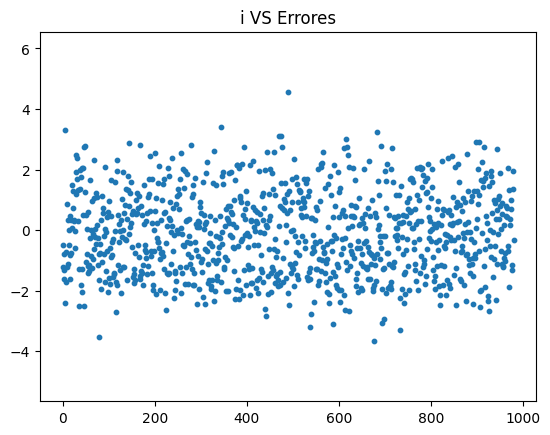

Error_spearman
Los residuos no presentan autocorrelación y el valor del estadistico de prueba es 2.0271875447591325


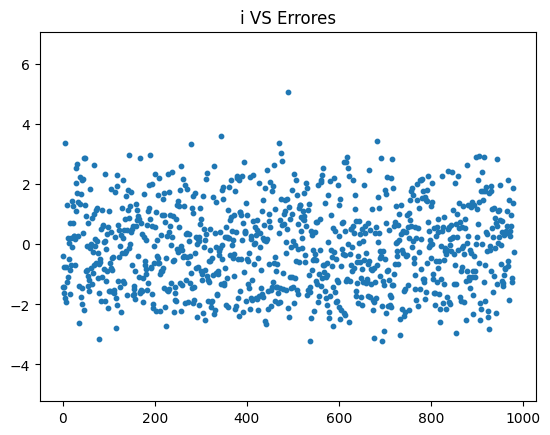

Error_kendall
Los residuos no presentan autocorrelación y el valor del estadistico de prueba es 2.0231508225218686


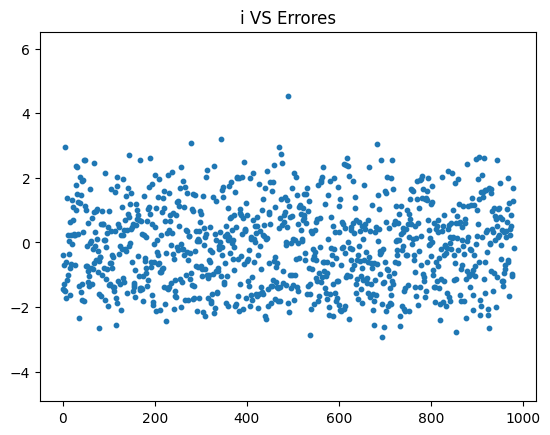

In [175]:
# Aplicación de la función de independencia para cada uno de los modelos
for i in errors.columns:
  print(i)
  independence(errors[i])

Prueba de normalidad de los errores

En el caso de los tres modelos sucede que se rechaza la hipotesis nula y se concluye que ninguno de los tres modelos tuvo predicciones con errores que tuvieran una distribución normal por lo tanto no se cumplió con el supuesto de normalidad y esto se debe en parte  a la alta varianza de los errores

Se rechaza la hipotesis nula, por lo tanto no se puede concluir normalidad 
p_value: 4.524697041355639e-05


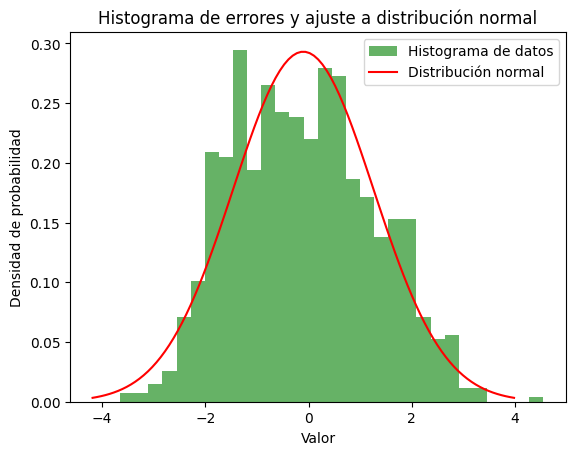

In [176]:
# Aplicación de la función normalidad para cada uno de los modelos
normal(errors['Error_pearson'])

Se rechaza la hipotesis nula, por lo tanto no se puede concluir normalidad 
p_value: 1.0583395760703933e-05


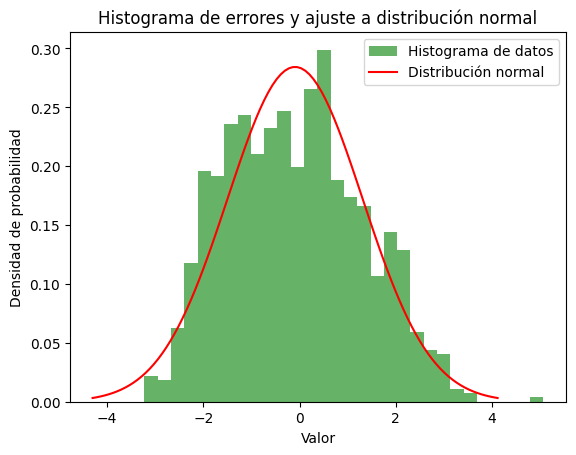

In [ ]:
normal(errors['Error_spearman'])

Se rechaza la hipotesis nula, por lo tanto no se puede concluir normalidad 
p_value: 6.418318975771732e-06


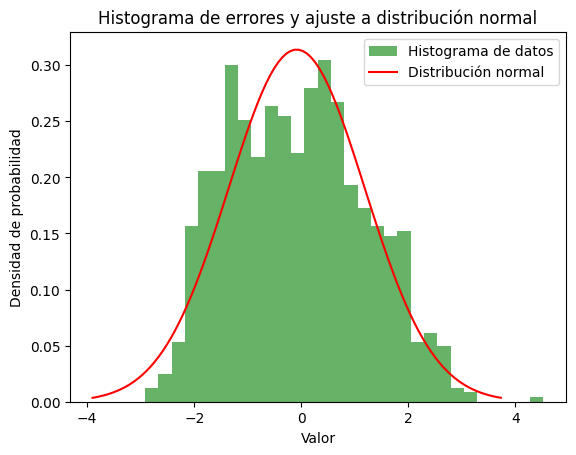

In [ ]:
normal(errors['Error_kendall'])

Prueba de media = 0

Como se puede observar en las siguientes pruebas, se rechaza la hipotesis nula y se concluye que hay diferencia significativa entre la media de los errores y el valor de comparación que es cero.

Haciendo inferencia sobre la media poblacional, se determina que estadisticamente es diferente de cero para los tres modelos.

Error_pearson
Se rechaza la hipotesis nula y se concluye que hay diferencia significativa entre la media de los errores y el valor 0 
p_value: 0.01898424390948209 


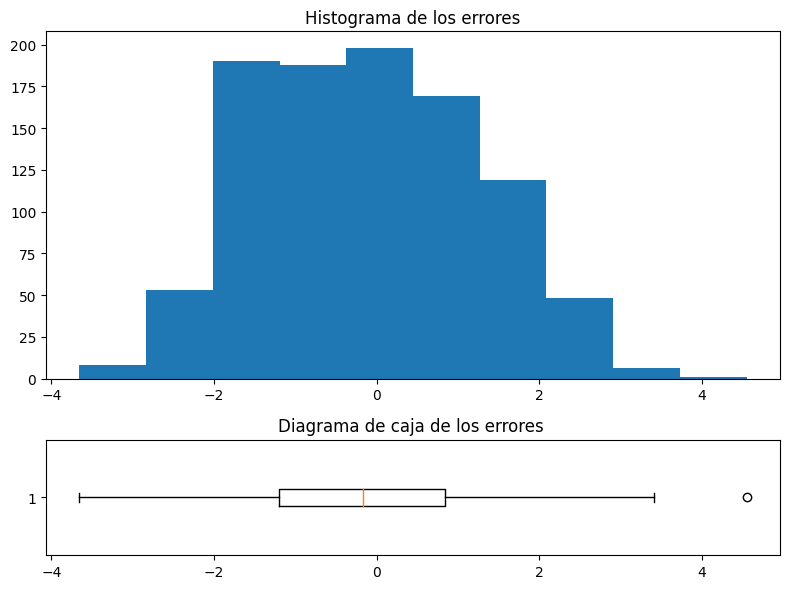

Error_spearman
Se rechaza la hipotesis nula y se concluye que hay diferencia significativa entre la media de los errores y el valor 0 
p_value: 0.01898424390948209 


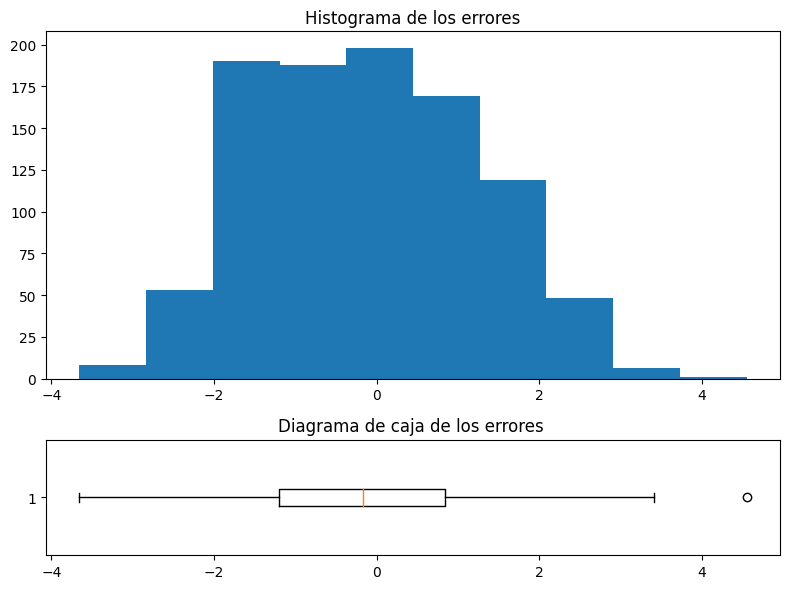

Error_kendall
Se rechaza la hipotesis nula y se concluye que hay diferencia significativa entre la media de los errores y el valor 0 
p_value: 0.01898424390948209 


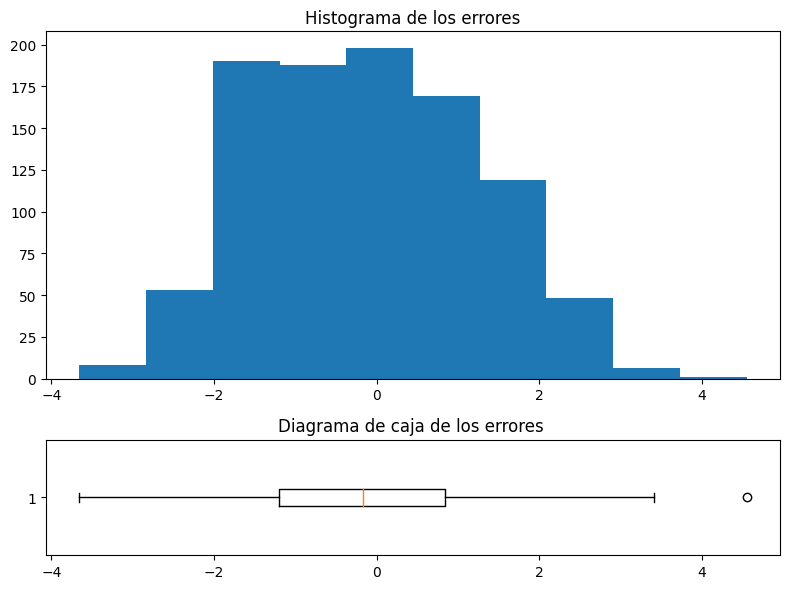

In [177]:
# Aplicación de la función media 0 para cada uno de los modelos
for i in errors.columns:
  print(i)
  media0(errors[i])

Prueba de Homocedasticidad

En las siguientes pruebas realizadas se determina que se rechaza la hipotesis nula y se concluye que hay heterocedasticidad enlos tres modelos de RLM

Graficamente se puede percibir las variaciones que hay en los errores a lo largo del eje X y esto se debe a la varianza visualizada en el conjunto de datos de entrenamiento en el inicio del analisis.

Error_pearson
Se rechaza la hipotesis nula, se asume heterocedasticidad 
P_value: 1.1981434244810989e-08


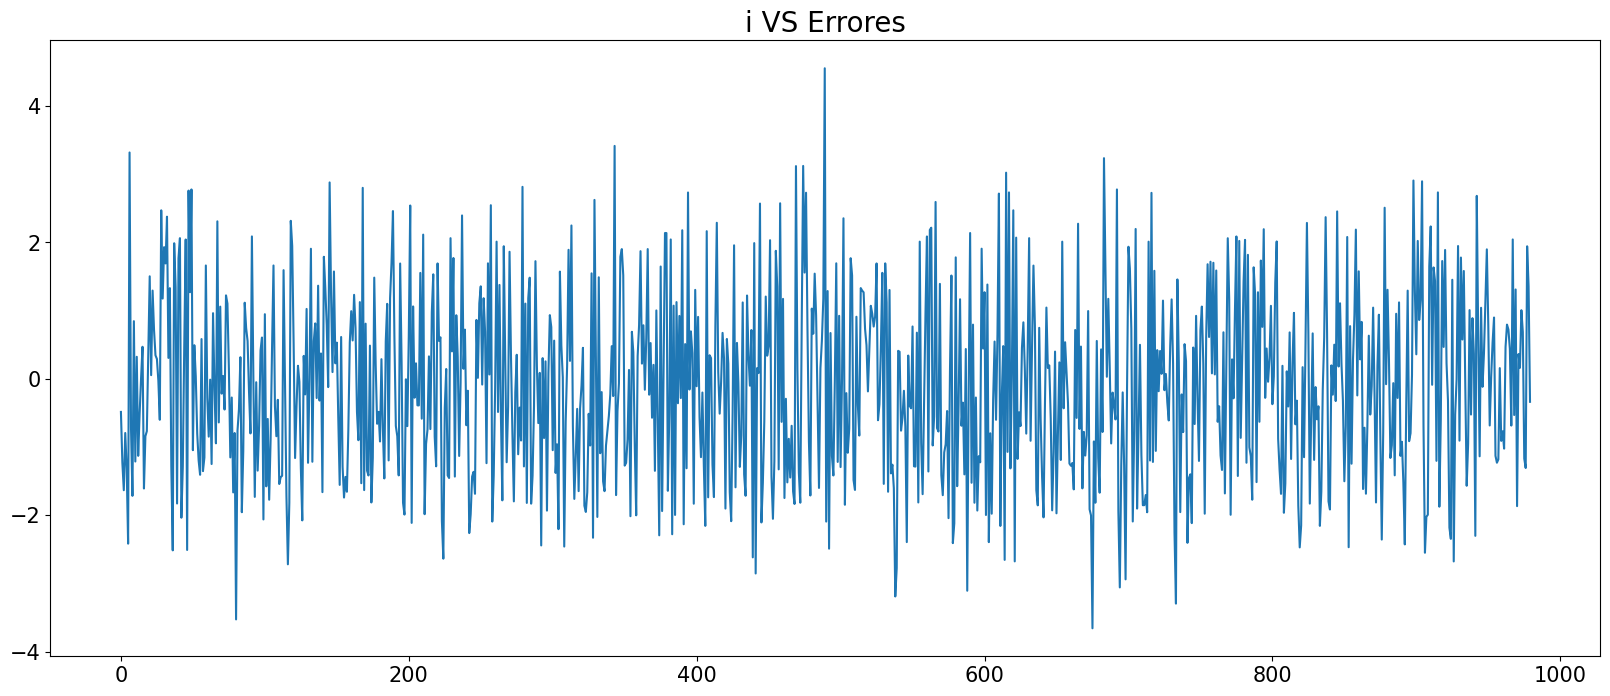


Error_spearman
Se rechaza la hipotesis nula, se asume heterocedasticidad 
P_value: 1.332917073660182e-12


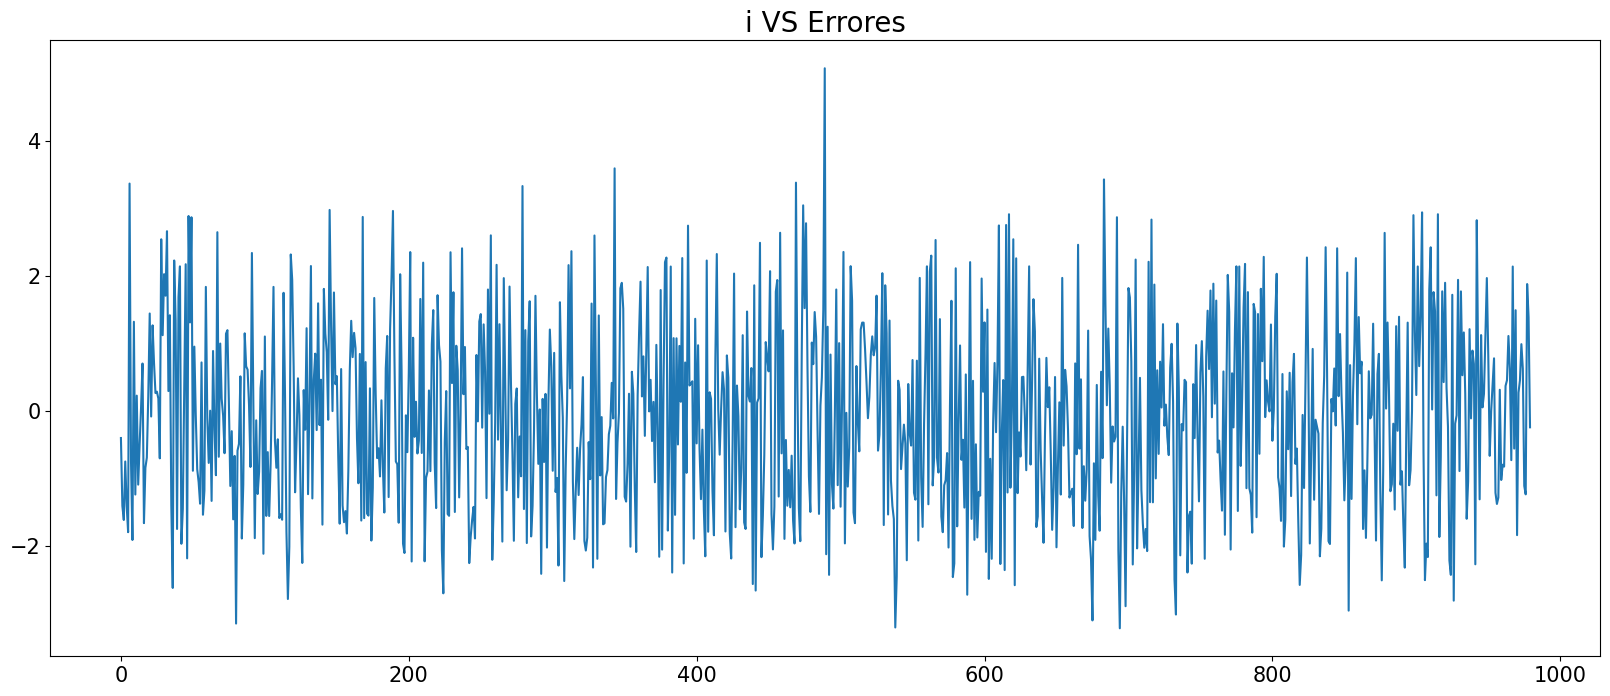


Error_kendall
Se rechaza la hipotesis nula, se asume heterocedasticidad 
P_value: 7.134442590093376e-15


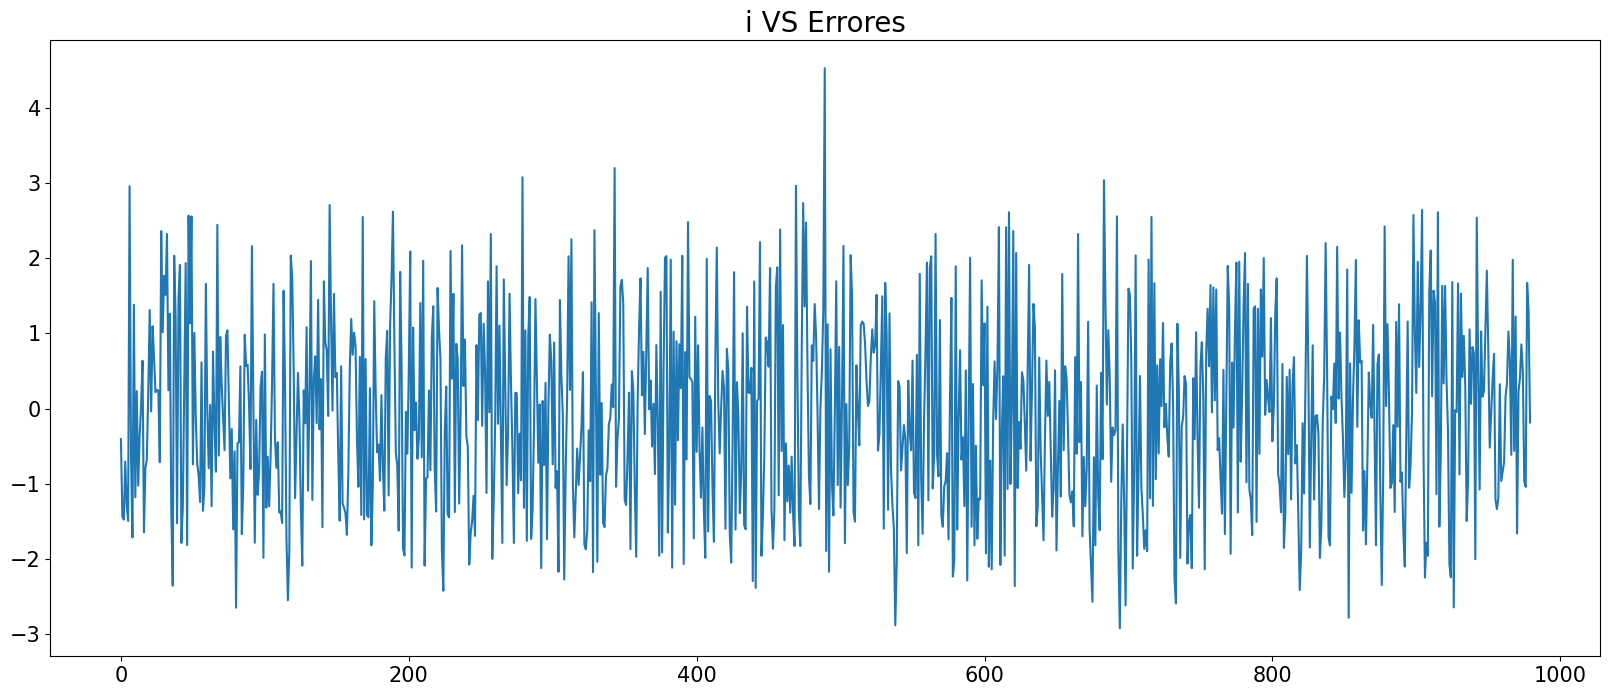

In [178]:
#Aplicación de la función homocedast para cada uno de los modelos
for i in errors.columns:
  print(i)
  homocedast(errors[i],X_test_scaled)
  print('')

#### Busqueda de transformación de variables

Realice un análisis del diagrama de dispersión del conjunto de datos ¿Se evidencian comportamientos totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones
de variables (Ejemplo: exp(Xi),
√
Xi
, log(Xi), X2
i
,
1
Xi
, etc.) y justifique el por qué de esa
transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.

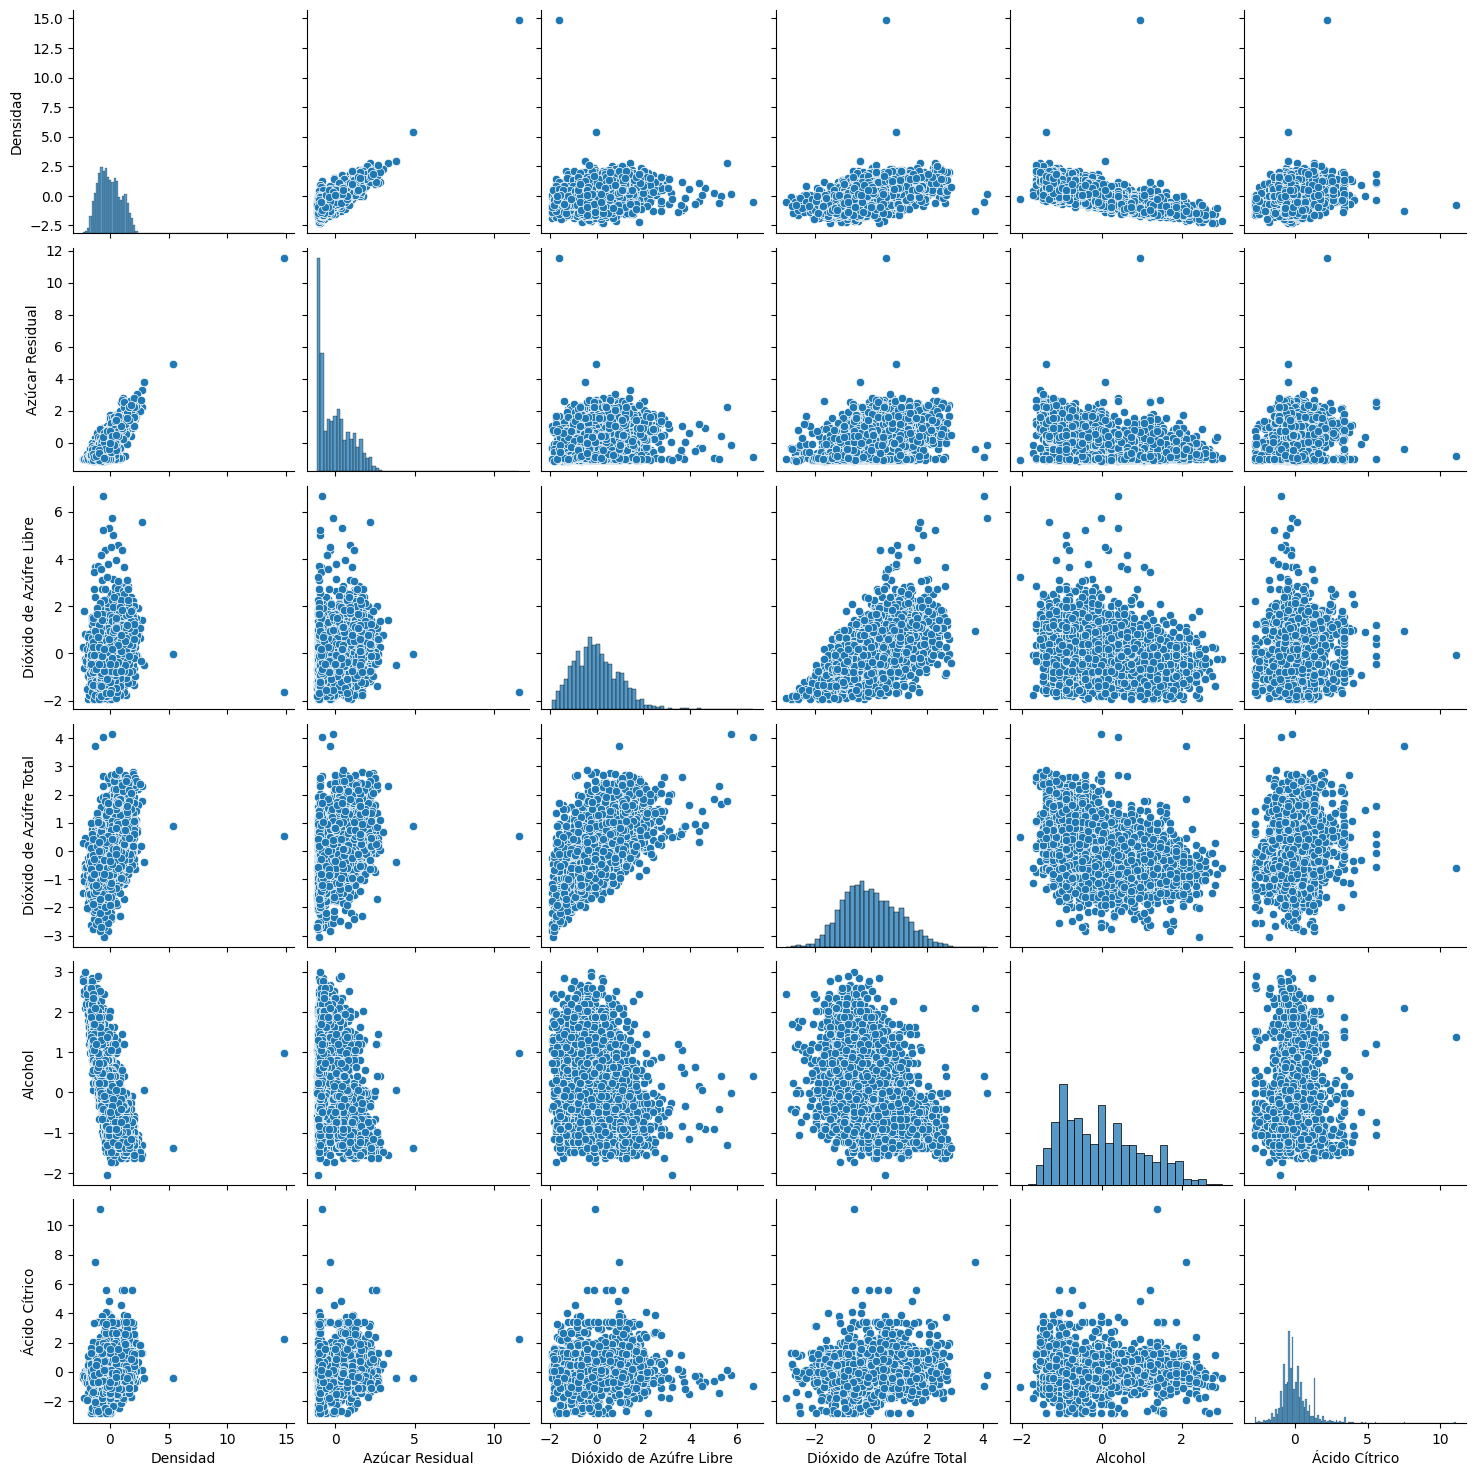

In [179]:
# Se realiza la visualización de la matriz de gráficas de dispersión para apoyar el analisis
# de las matrices de correlación
sns.pairplot(df_est)

De acuerdo a las variables que tienen una mayor correlación con la variable dependiente cómo lo son las variables Azúcar Residual y Alcohol

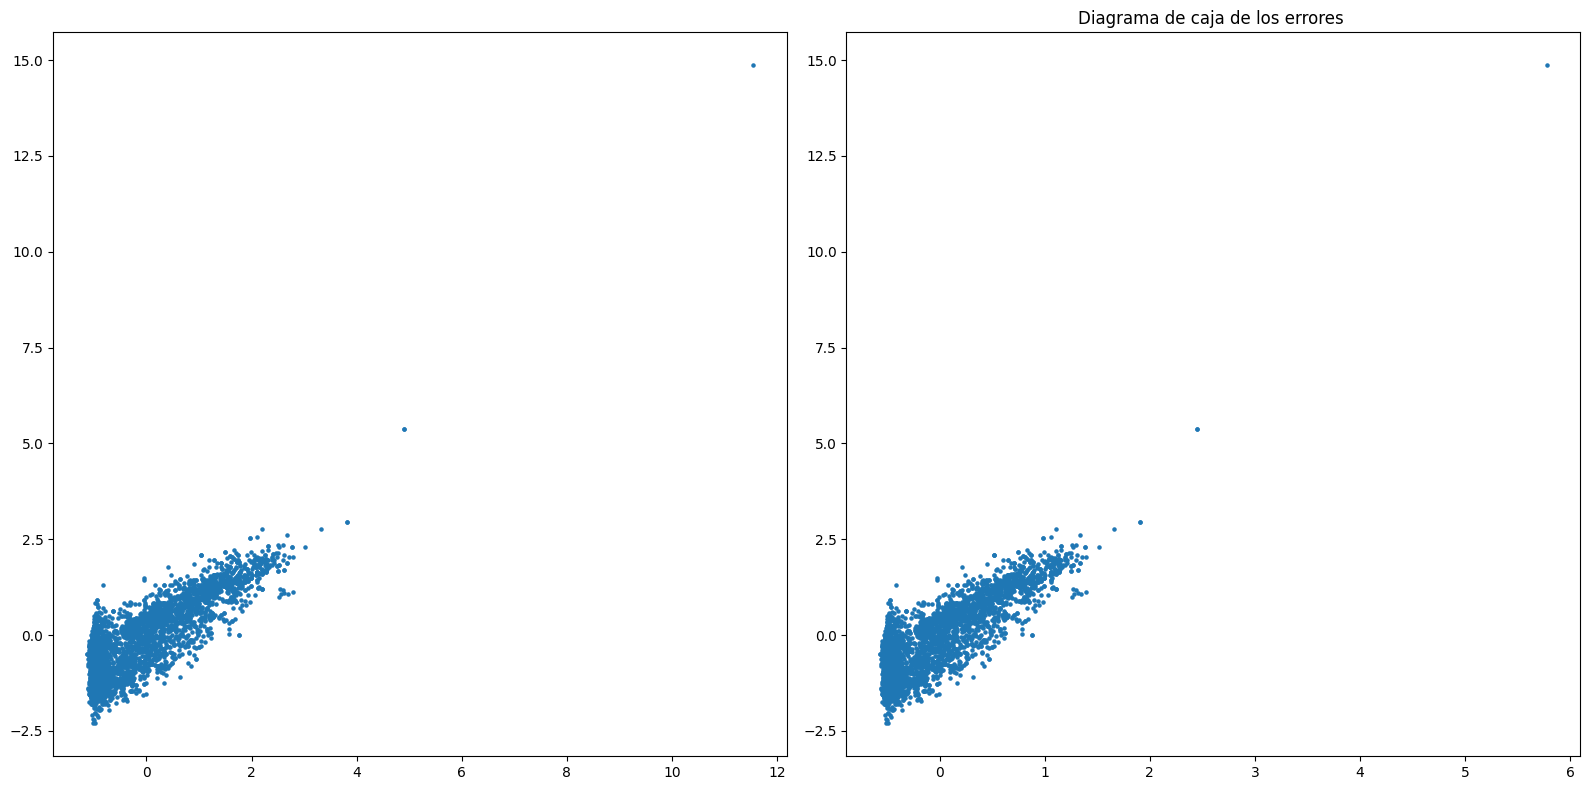

In [180]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

vars = ['Azúcar Residual','Alcohol']

# Variable sin transformar
ax1.scatter(df_est[vars[0]],df_est['Densidad'],s=5)

# Variable transformada
ax2.scatter((df_est[vars[0]])*1/2,df_est['Densidad'],s=5)
ax2.set_title('Diagrama de caja de los errores ')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

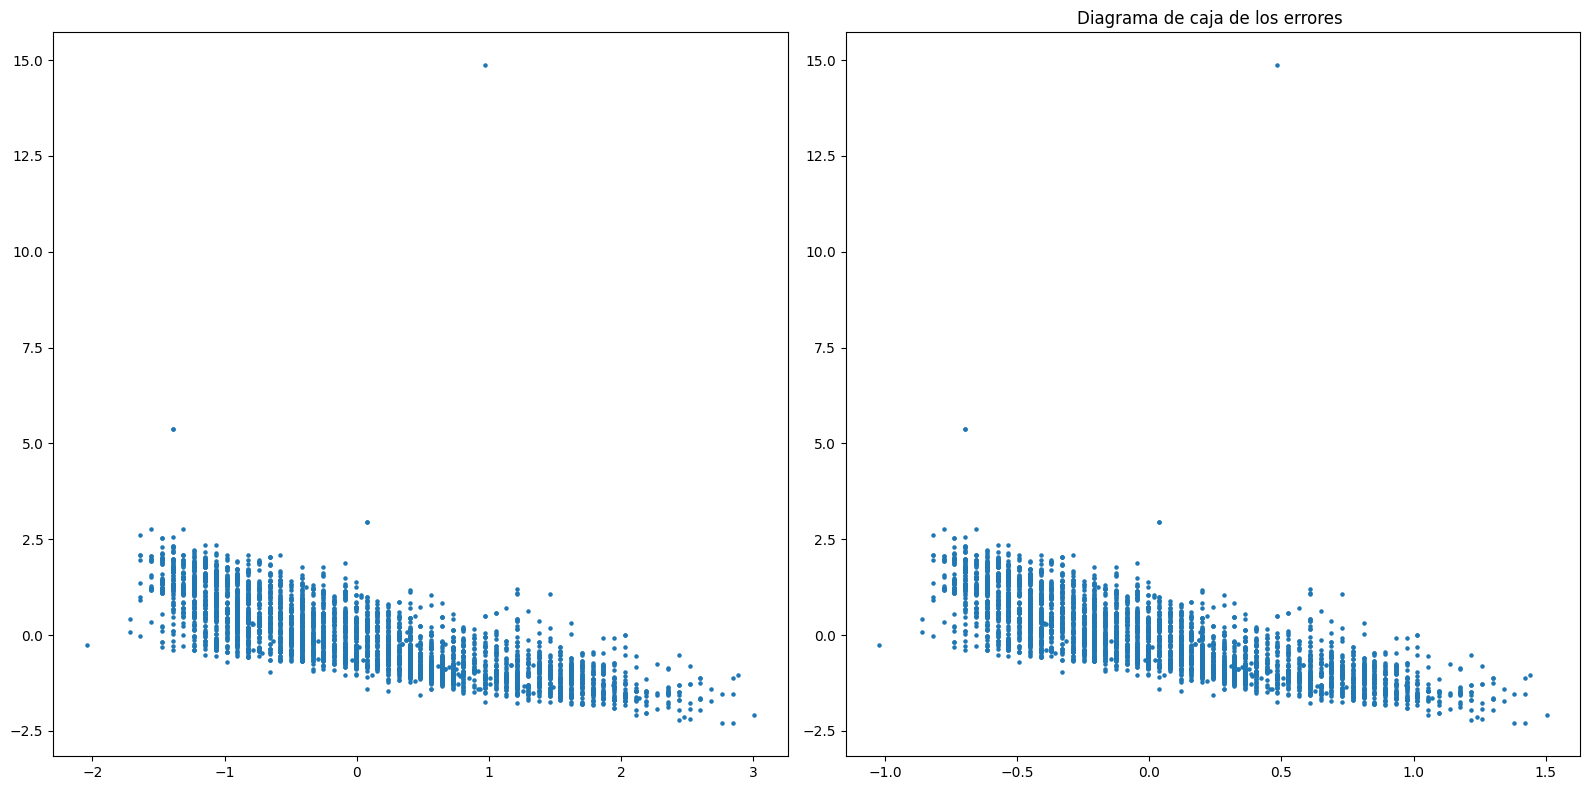

In [181]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

vars = ['Azúcar Residual','Alcohol']

# Variable sin transformar
ax1.scatter(df_est[vars[1]],df_est['Densidad'],s=5)

# Variable transformada
ax2.scatter((df_est[vars[1]])*1/2,df_est['Densidad'],s=5)
ax2.set_title('Diagrama de caja de los errores ')

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Como se pudo observar las variables de mayor correlación con respecto a la variable de respuesta tienen cierta tendencia lineal y no se encuentra una forma que se adapte a otra función conocida y pueda ser linealizada, por lo tanto se establece que no es conveniente hacer la transformación.

Con las otras variables que tienen correlación debil solo se visualiza comportamientos con forma de circunferencia,como sucede con el Ácido Cítrico y fue evidenciado en los primeros analisis o tambien sucede que se encontraron comportamientos elipticos como sucede con la variable Dioxido de Azufre Libre y Total pero no se encuentra nuevamente una función para que sean transformadas

### Ejercicio No. 4 - Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico:- TV: Gasto en publicidad en televisión.- Radio: Gasto en publicidad en radio.- Newspaper: Gasto en publicidad en periódicos.- Sales: Número de unidades vendidas (en miles)

In [ ]:
# Lectura del conjunto de datos publicidad.csv
file_path = "/content/publicidad.csv"
df = pd.read_csv(file_path)
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [ ]:
# Observamos los nombres de las columnas del dataframe df
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
# Miramos a vista rápida sus características estadísticas
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

#### Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”).

Para ello use la función scatter_matrix() del paquete pandas e interprete los gráficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

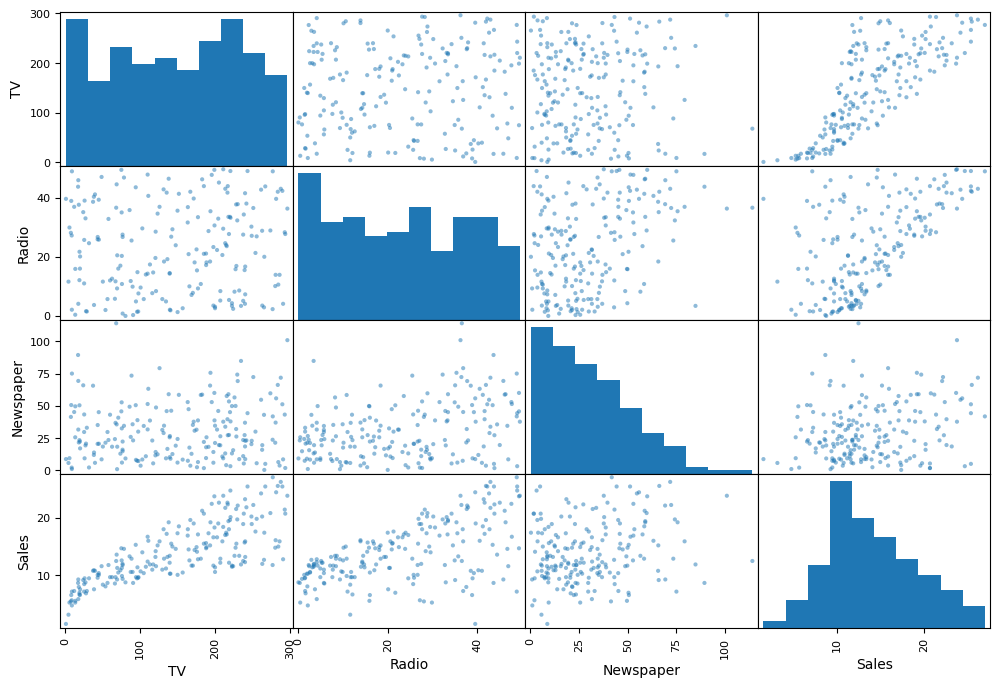

In [ ]:
# Gráfica de histogramas en la diagonal y dispersión en la antidiagonal para las variables seleccionadas
pd.plotting.scatter_matrix(df[['TV','Radio','Newspaper','Sales']], figsize=(12, 8))
plt.show()

De acuerdo a la gráfica mostrada anteriormente se observa que las variable Tv y Radio tienen una relación lineal positiva con gran nivel de correlación más fuerte para el tv pues su dispersión de puntos es menor que la del radio, entre tanto se descarta fuerte correlación con la variable newspaper ya que muestra una relación lineal pero con mucha varianza.

#### Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones.

¿Interprete las estructuras de dependencia encontradas?

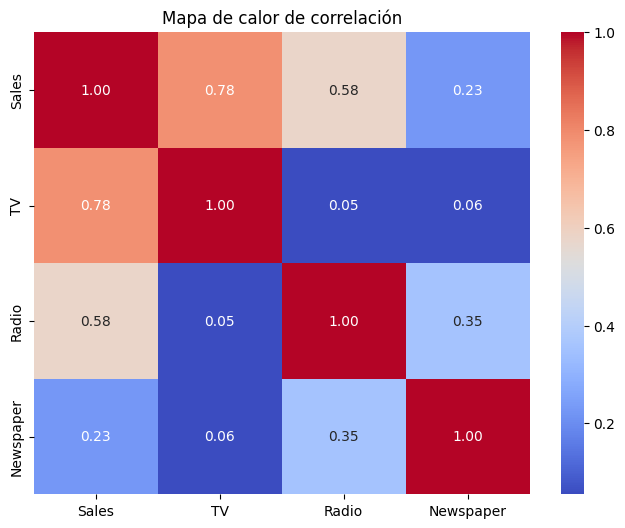

In [ ]:
matriz = df[['Sales', 'TV', 'Radio', 'Newspaper']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

De acuerdo al mapa de calor se puede evidenciar que la variable dependiente"tv" tiene una correlación mayor  vs "Radio" y "Newpaper" lo cual garantiza una relación lineal mas fuerte.

#### Teniendo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta.

¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

##### Regresión lineal utilizando "TV" como variable predictora

Haremos la construcción del modelo con 2 opciones diferentes para demostrar que se llegan a los mimsos resultados.

In [ ]:
# Construcción del modelo opción 1

# Variable explicativa o descriptora 'TV'
X = df[['TV']]
# Variable objetivo 'Sales'
y = df['Sales']

model = LinearRegression()

model.fit(X, y)

beta_0 = model.intercept_
beta_1 = model.coef_[0]

predictions = model.predict(X)

r_squared = r2_score(y, predictions)

print("Intercepto (beta_0):", beta_0)
print("Coeficiente de TV (beta_1):", beta_1)
print("Coeficiente de determinación R^2:", r_squared)


Intercepto (beta_0): 7.032593549127695
Coeficiente de TV (beta_1): 0.04753664043301975
Coeficiente de determinación R^2: 0.611875050850071


In [ ]:
# Construcción del modelo opción 2
# el sm.OLS nos pide un y que será df.Sales y un X que será df.TV, en X debemos agregar
# una constante que nos permita calcular beta o cuando se ejecute, esta será Const.

modelo = sm.OLS(df.Sales, sm.add_constant(df.TV))
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        12:14:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Un R^2 se determina entre valores 0 y 1 el cual me explica el ajuste del modelo con base en los datos observados, es decir que el 62% (0.612) de la varianza de la variable dependiente (Ventas) puede explicarse por la variable independiente (Anuncios de "Tv").

In [ ]:
r2 = resultado.rsquared
print("Coeficiente de determinación R^2:", r2)

Coeficiente de determinación R^2: 0.611875050850071


Ecuación de la Recta

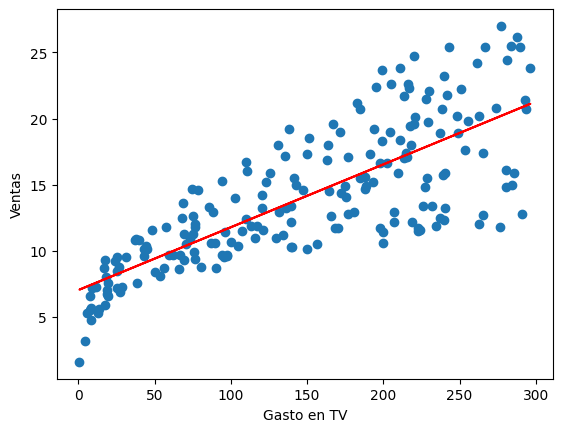

In [ ]:
# Sabemos que el coef de las variables del modelo OLS nos dan pendiente e intercepto en este caso
#Coef de tv o beta_1
pendiente = 0.0475
#Coef de const o beta_0
intercepto = 7.0326

# Teniendo en cuenta que la formula de la recta es:
# f(x) = m*x + b, donde m = pendiente y b = intercepto

# Diagrama de dispersión de las variables "TV" vs "Sales"
plt.scatter(df.TV, df.Sales)

# gráfica de la recta resultante del modelo de regresion lineal
plt.plot(df.TV, pendiente*df.TV + intercepto, color="red")

plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')
plt.show()

Se grafica la línea que mejor se ajusta a los datos observados

#### Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior.

¿Cuál es el intervalo de confianza del 95% para la predicción?

In [ ]:
anuncios = 5

retorno = model.predict([[anuncios]])

n_observaciones = len(X)

grados_libertad = n_observaciones - 2

error_estandar_prediccion = np.sqrt(np.sum((y - predictions) ** 2) / grados_libertad)

valor_critico = t.ppf(0.975, df=grados_libertad)

intervalo_inferior = retorno - valor_critico * error_estandar_prediccion
intervalo_superior = retorno + valor_critico * error_estandar_prediccion

print("Retorno de inversión esperado:", retorno)
print("Intervalo de confianza del 95%:", (intervalo_inferior, intervalo_superior))

Retorno de inversión esperado: [7.27027675]
Intervalo de confianza del 95%: (array([0.84414944]), array([13.69640406]))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


De acuerdo a los resultados obtenidos se tiene una tasa de retorno de 7.27 por cada anuncio de tv vendido, y el intervalo de confianza se encuentra entre 0.84 y 13.6 en el cual se encuentra, con alta probabilidad, el valor real del Retorno.

### Ejercicio No. 5 - Se desea predecir la resistencia a la compresión del concreto (Concrete compressive strength) en función de diferentes variables predictoras como el cemento (Cement), la escoria (Slag), la ceniza volante (Fly ash), el agua (Water), el superplastificante (Superplasticizer), el agregado grueso (Coarse aggregate) y el agregado fino (Fine aggregate).

Para ello se dispone de un conjunto de datos con 1030 observaciones. Se desea construir un modelo de regresión lineal múltiple para predecir la resistencia a la compresión del concreto en función de las variables predictoras.

#### Cargar los datos del archivo “Concrete_Data.xls” y examinar las características del conjunto de datos.

In [ ]:
df = pd.read_excel (r'/content/Concrete_Data.xls', sheet_name ='Sheet1')
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [ ]:
df.tail()

Cement (component 1)(kg in a m^3 mixture)  \
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                              989.6      
1029                                              864.5      

      Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
1025                                              768.3         28   
1026                                              813.4         28   
1027                                              780.0         28   
1028                                              788.9         28   
1029                                              761.5         28   

      Concrete compressive strength(MPa, megapascals)   
1025                                         44.284354  
1026                                         31.178794  
1027                                         23.696601  
1028                                         32.768036  
1029                                         32.401235

#### Realizar un análisis exploratorio de los datos para entender la relación entre las variables predictoras y la variable respuesta.

In [ ]:
# Se hace revisión de la estructura del dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
# Observamos los nombres de las columnas o variables del dataframe
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
# Se cambian los nombres de las variables
nuevos_nombres = ['Cement', 'Blast','Fly','Water','Superplasticizer','Coarse', 'Fine', 'Age', 'Concrete']
df.columns = nuevos_nombres

In [ ]:
# Se procede a hacer las busqueda de valores perdidos o nulos o vacíos
valores_perdidos_por_columna = df.isnull().sum()
print(valores_perdidos_por_columna)

# No se encuentran valores faltantes

Cement              0
Blast               0
Fly                 0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age                 0
Concrete            0
dtype: int64


In [ ]:
con_decimales = df.describe()
sin_decimales = con_decimales.round()
print(sin_decimales)

       Cement   Blast     Fly   Water  Superplasticizer  Coarse    Fine  \
count  1030.0  1030.0  1030.0  1030.0            1030.0  1030.0  1030.0   
mean    281.0    74.0    54.0   182.0               6.0   973.0   774.0   
std     105.0    86.0    64.0    21.0               6.0    78.0    80.0   
min     102.0     0.0     0.0   122.0               0.0   801.0   594.0   
25%     192.0     0.0     0.0   165.0               0.0   932.0   731.0   
50%     273.0    22.0     0.0   185.0               6.0   968.0   780.0   
75%     350.0   143.0   118.0   192.0              10.0  1029.0   824.0   
max     540.0   359.0   200.0   247.0              32.0  1145.0   993.0   

          Age  Concrete  
count  1030.0    1030.0  
mean     46.0      36.0  
std      63.0      17.0  
min       1.0       2.0  
25%       7.0      24.0  
50%      28.0      34.0  
75%      56.0      46.0  
max     365.0      83.0  


Se identifica en la matriz multicolinealidad entre variables independientes.

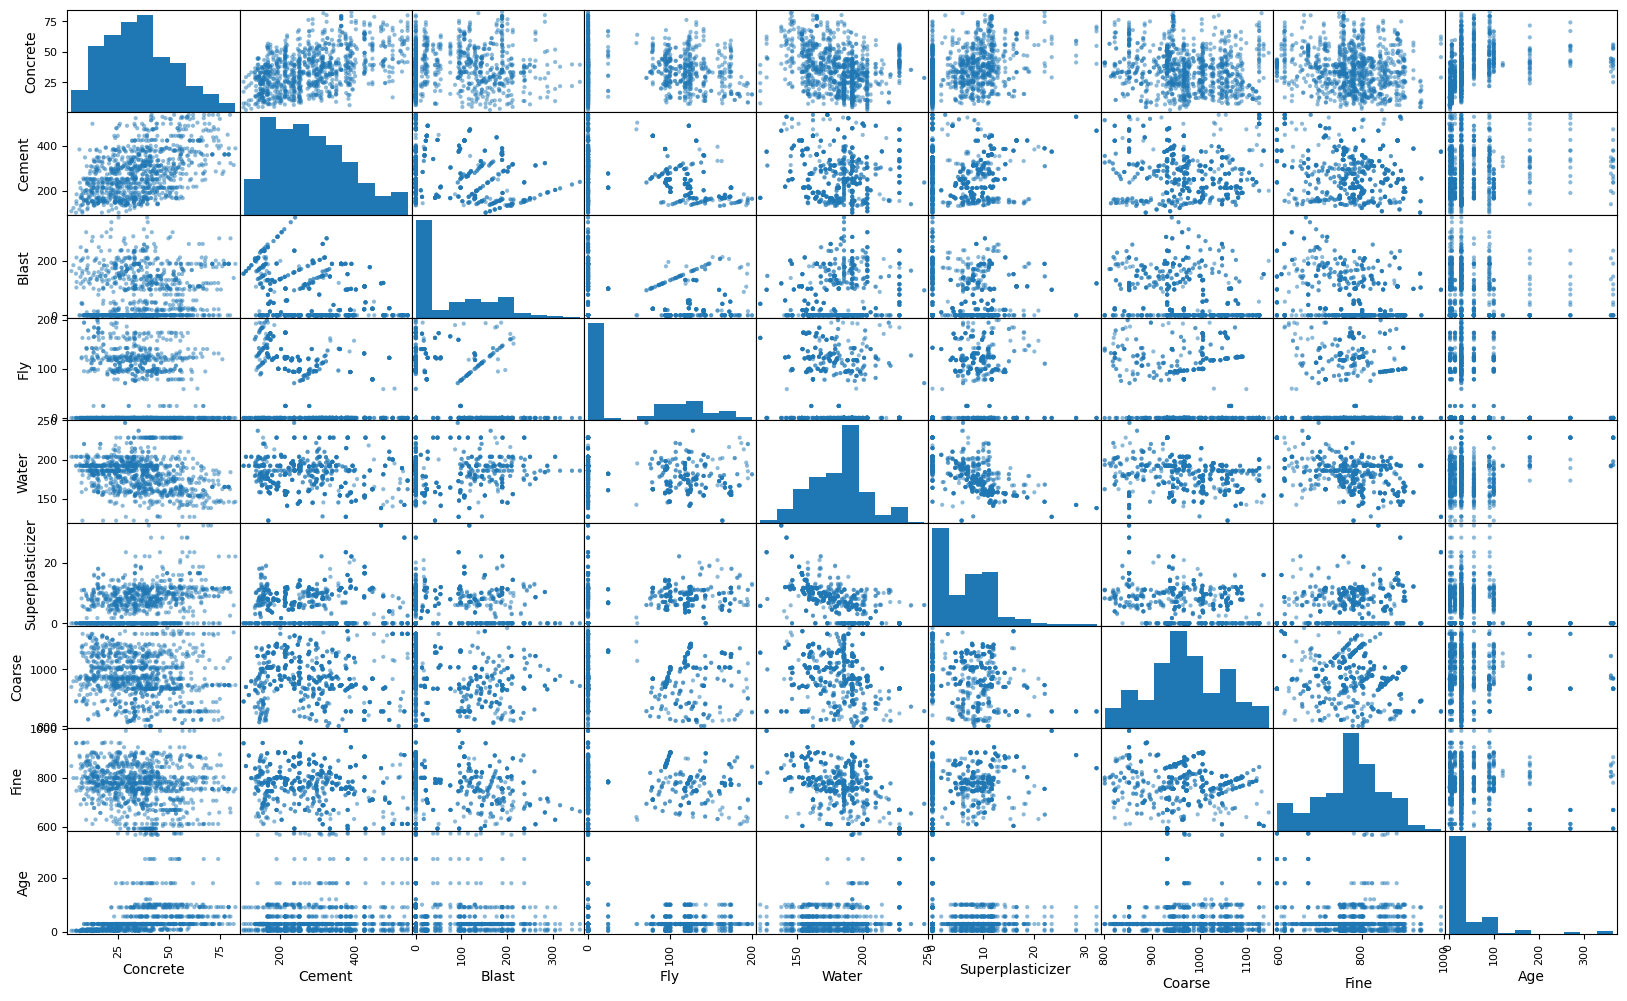

In [ ]:
# Se realiza una gráfica para observar el histograma de las variables independientes en la diagonal
# y sus dispersiónes en la antidiagonales
pd.plotting.scatter_matrix(df[['Concrete','Cement','Blast','Fly','Water','Superplasticizer','Coarse','Fine','Age']], figsize=(20, 12))
plt.show()

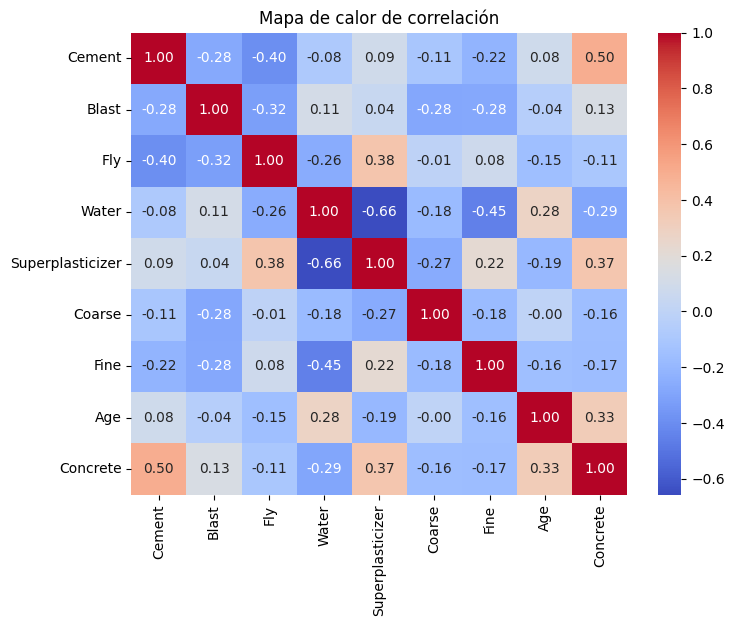

In [ ]:
# Hacemos un estudio de las correlaciones de pearson del dataframe
matriz = df.corr()

# Acomodamos correlaciones desde la mayor a la menor respecto a la variable dependiente
# y redondeamos su valor a 2 cifras decimales
mat_corr_desc = round(matriz['Concrete'].sort_values(ascending=False), 2)

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación')
plt.show()

In [ ]:
# Observamos los valores de correlaciones de mayor a menor respecto
# a la variable dependiente
mat_corr_desc

Concrete            1.00
Cement              0.50
Superplasticizer    0.37
Age                 0.33
Blast               0.13
Fly                -0.11
Coarse             -0.16
Fine               -0.17
Water              -0.29
Name: Concrete, dtype: float64

la variable 'Cement' genera la correlación más fuerte con un valor de 0.50, de las variables independientes vs mi variable dependiente.

También podemos decir que las variables 'Superplasticizer' con 0.37 y 'Age' con 0.33 generan una correlación moderada.

La variable 'Blast' con 0.13 sería la última en generar una correalación significativa aunque en este caso sería la última y más débil

#### Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de datos y evalue si hay significancia en el modelo.

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
# Variables independientes
X = df[['Cement', 'Blast','Fly','Water','Superplasticizer','Coarse', 'Fine', 'Age']]
# Variable dependiente
Y = df['Concrete']

# Agregar el término constante para ajustar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               Concrete   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          6.76e-206
Time:                        16:29:25   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.1638     26.588  

Se realiza el modelo de regresión lineal multiple evidenciando que se encuentra significancia en el modelo ya que:
- El P_Value del F-statistic: es < 0.005 , el modelo genera un P_value de 6.76e-206.
- El Adj. R-squared (Error cuadrado de R ajustado) es 0.612, que quiere decir que las variables independiente pueden predecir la variable dependiente en un 61.2%, de acuerdo al modelo desarrollado


#### Analizar la significancia estadística de las variables predictoras y construir un modelo de regresión lineal múltiple reducido con las variables significativas. Revise su desempeño con respecto al modelo completo revisando elAdj R2 y los criterios de información de Akaike y de Bayes(AICyBIC).

Se evalua la significancia de las variables predictorias del modelo tomado anteriormente y se eliminan cuya variable tienen el P_Value > 0.05, es decir Fine =0.060 y se ejecuta nuevamente para validar el nuevo calculo del P_Value de las variables independientes.

Al reducirse de 1 en 1 las cantidad de variables en el modelo, primero se analizaa la que sobrepasa este enunciado mayormente. Debido a que la variable 'Coarse' también  tiene un p_value > 0.05, Coarse = 0.055.

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (Y)

# Variables independientes
X = df[['Cement', 'Blast','Fly','Water','Superplasticizer','Coarse','Age']]
# Variable dependiente
Y = df['Concrete']

# Agregar el término constante para ajustar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())  # Variables independientes
Y = df['Concrete'] #Variable dependiente


                            OLS Regression Results                            
Dep. Variable:               Concrete   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     232.4
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          2.49e-206
Time:                        17:06:13   Log-Likelihood:                -3870.8
No. Observations:                1030   AIC:                             7758.
Df Residuals:                    1022   BIC:                             7797.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.0627      8.843  

Se evalua la significancia de las variables predictorias del modelo nuevamente ejecutado y se eliminan cuya variable tienen el P-Value > 0.05, es decir Coarse =0.523 y se ejecuta nuevamente para validar el nuevo calculo del P_Value de las variables independientes.

In [ ]:
# Dividir los datos en variables independientes (X) y variable dependiente (Y)
# Variables independientes
X = df[['Cement', 'Blast','Fly','Water','Superplasticizer','Age']]
#Variable dependiente
Y = df['Concrete']

# Agregar el término constante para ajustar el intercepto
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(Y, X)

# Ajustar el modelo
resultado = modelo.fit()

# Imprimir un resumen del modelo
print(resultado.summary())  # Variables independientes
Y = df['Concrete'] #Variable dependiente

                            OLS Regression Results                            
Dep. Variable:               Concrete   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     271.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):          1.78e-207
Time:                        17:12:35   Log-Likelihood:                -3871.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1023   BIC:                             7791.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               29.0302      4.212  

Se evalua nuevamente el modelo y se determina las variables con significancia ya que todas
tienen P_value < 0.05

Modelo 1 = Modelo Con todas las variables.
Modelo 2 = Modelo con variables significativas

La variación del coeficiente de determinación no varía entre nuestro modelo 1  y 2 igual que el AIC que genera igual calidad del modelo y con un BIC menor en el modelo 2, me indica menor número de variables lo cual lo hace el más adecuado.

#### Valide los supuestos del modelo iiidN(0 2) y en caso de no cumplir alguno, proponga una solución.Evalúe la conveniencia de usar un enfoque robusto en este caso

##### Media Cero:  Se verifican residuales centrados en 0 con una prueba T test.
HO: Los residuales están centrados en cero || H1: Los residuales no están centrados en cero
El valor es cercano a 1 lo que significa que no hay evidencia significativa para rechazar la hipótesis nula.

Se evidencia en la grafica  que la mayoria de valores son cercanos a 0

In [ ]:
ttest_1samp(resultado.resid,0)

TtestResult(statistic=-4.8804038396350114e-14, pvalue=0.9999999999999611, df=1029)

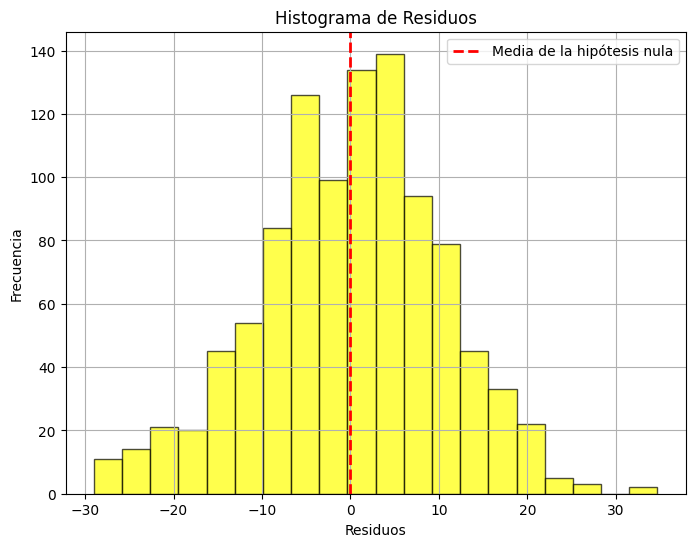

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(resultado.resid, bins=20, color='yellow', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Media de la hipótesis nula')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.legend()
plt.grid(True)
plt.show()

##### Independencia: analizamos el Durbin- Watson que se encuentre entre 1.5 y 2.5 para garantizar independencia.
Sin embargo de acuerdo al modelo nos genera un valor de 1.2 lo cual nos da a entender que no hay independencia entre los errores.

In [ ]:
dw_statistic = sm.stats.stattools.durbin_watson(resultado.resid)
print("Durbin-Watson statistic:", dw_statistic)

Durbin-Watson statistic: 1.2859452611038247


##### Normalidad: No se rechaza a H0 si mi P-Value es >0.05
De acuerdo al prob(JB) (0.0745) me indica que hay normalidad.

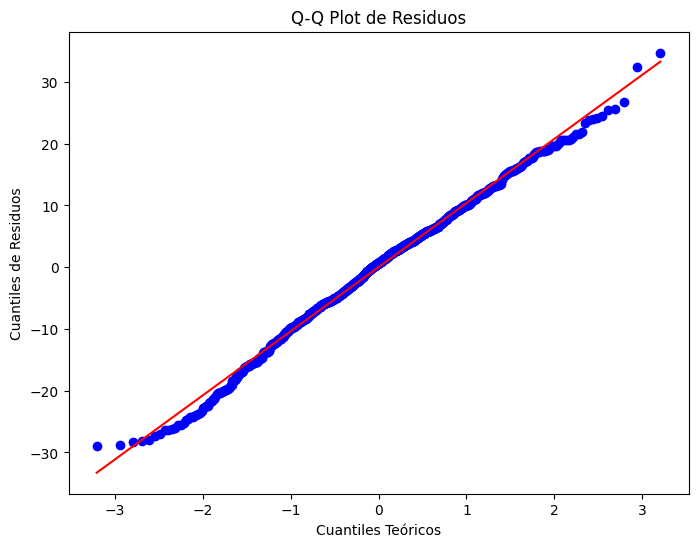

In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(resultado.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de Residuos')
plt.show()

##### Homocedasticidad: calculamos con breusch pagan en donde P- Value sea > a 0.05 no se rechaza H0 por lo tanto hay homocedasticidad, sin embargo en el modelo se obtiene un P_Value (1.4915.....-27) lo cual me indica hay heterocedasticidad.

In [ ]:
#Calculo con el metodo breuschpagan
names = ["lagrange multiplier statistic", "p-value", "f-value", "f p-value"]

bp_test = sms.het_breuschpagan(resultado.resid, resultado.model.exog)

lzip(names, bp_test)

[('lagrange multiplier statistic', 139.18162251188608),
 ('p-value', 1.4915855798339575e-27),
 ('f-value', 26.638950472924215),
 ('f p-value', 1.388221273689927e-29)]

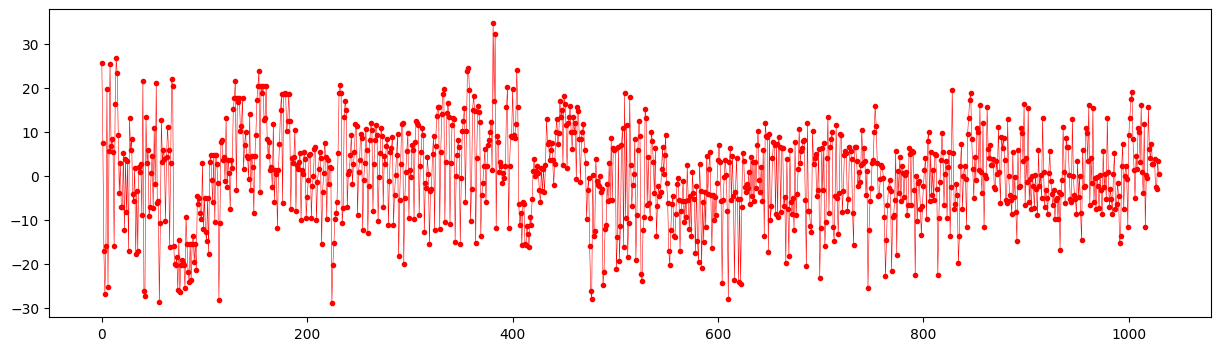

In [ ]:
# Gráfica de Homocedasticidad
plt.figure(figsize=(15, 4))
plt.plot(resultado.resid, '.-', color="red", linewidth=0.4)
plt.show()

De acuerda al gráfico se ven comportamientos de picos y valles muy alejados entre los puntos con mucha variabilidad lo que me indica que se esta forzando al modelo a predecir algo que no es lineal.

#### Modelo Robusto

In [ ]:
# Ajusta el modelo RLM
modelo_rlm = sm.RLM(Y, X)
resultado_rlm = modelo_rlm.fit()

print(resultado_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               Concrete   No. Observations:                 1030
Model:                            RLM   Df Residuals:                     1023
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Apr 2024                                         
Time:                        17:30:27                                         
No. Iterations:                    20                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.8922      4.165  

In [ ]:
DW = durbin_watson(resultado_rlm.resid)
print("Estadística de Durbin-Watson (DW):", DW)

Estadística de Durbin-Watson (DW): 1.2936009115636884


Se puede observar en el modelo robusto que los valores no cambian con respecto al modelo no robustecido, se evidencia que se conservan lo P_Values muy cercanos al modelo anterior , al igual se hace el cálculo del supuesto de independecia donde pasa a ser 1.293 vs un 1.285, a pesar que mejora no es suficiente para considerarlo entre los valores indicados 1.5 y 2.5, por lo tan el uso del modelo robusto no es conveniente.

### Ejercicio No. 6 Cada equipo debe leer el(los) artículo(s) correspondiente(s) y hacer un informe detallado de al menos 2 páginas (tipo Short Communication, por ejemplo), incluida una discusión sobre el tópico tratado y la relación con los temas vistos en el curso.